In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify

In [2]:
df = pd.read_csv('goals.csv')

In [3]:
df.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [4]:
club_goals = df.groupby('club')['goals'].sum().sort_values(ascending=False)

In [5]:
club_goals

club
Bayern              30
Liverpool           30
Real Madrid         28
Man. City           28
Chelsea             21
Ajax                21
Villarreal          20
Leipzig             15
Paris               15
Sporting CP         14
Benfica             13
Man. United         12
Atalanta            12
Juventus            11
Dortmund            10
Salzburg            10
Inter                9
Atlético             9
Zenit                9
LOSC                 8
Young Boys           7
Sheriff              7
Milan                5
Club Brugge          5
Wolfsburg            5
Sevilla              5
Beşiktaş             3
Barcelona            2
Shakhtar Donetsk     2
Porto                2
Dynamo Kyiv          1
Malmö                1
Name: goals, dtype: int64

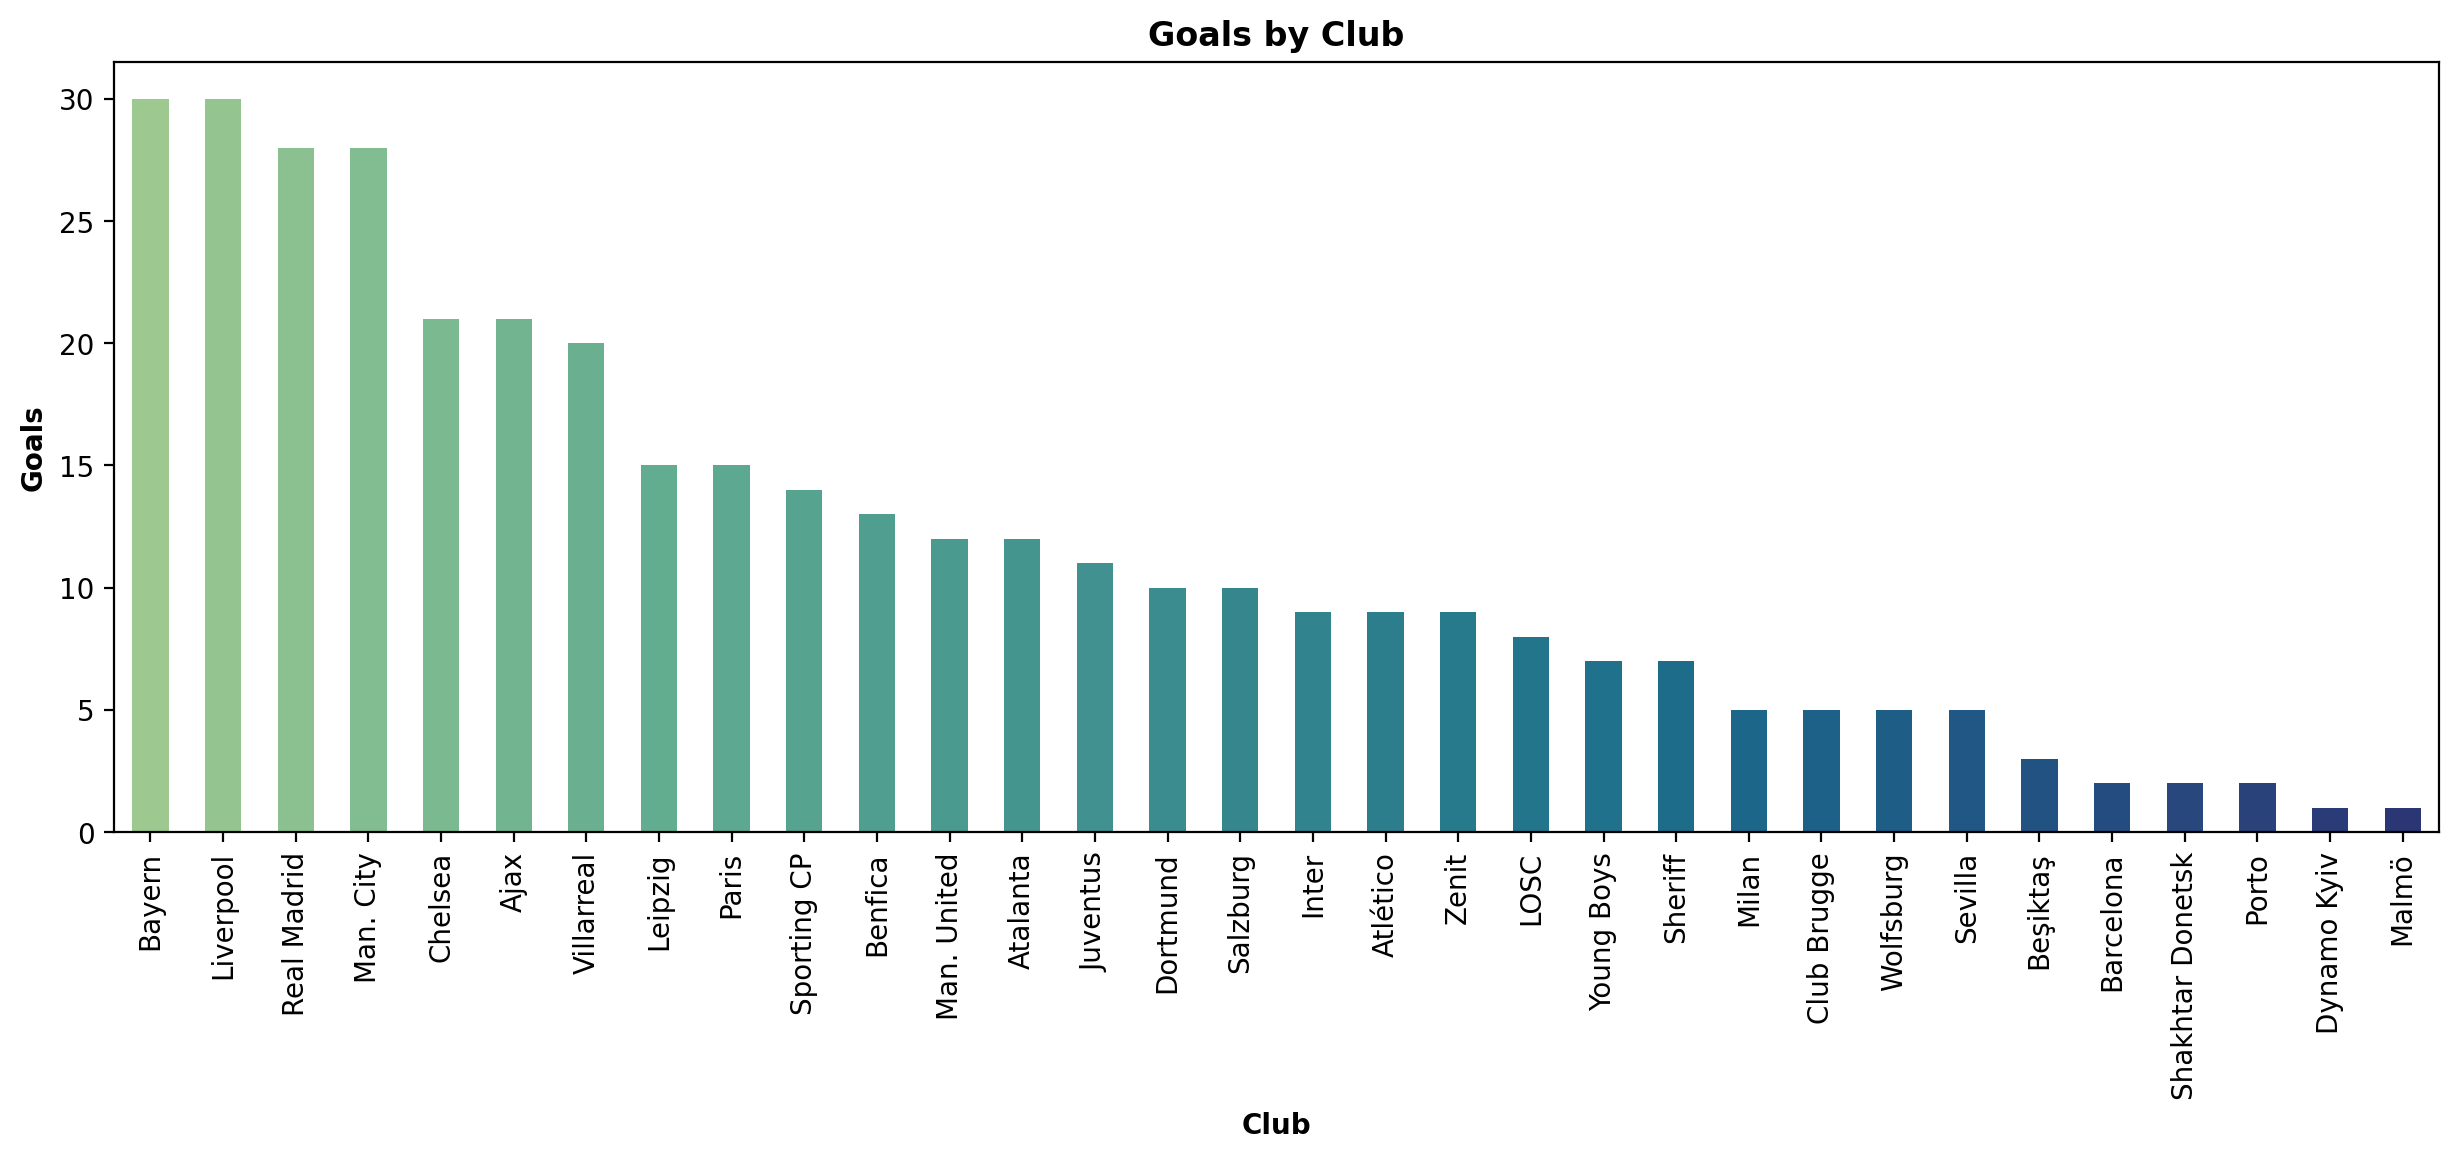

In [6]:
plt.figure(figsize = (15,5), dpi = 200)
club_goals.plot(kind = 'bar' ,color= sns.color_palette('crest',len(club_goals)))
plt.title('Goals by Club',weight = 'bold', fontsize = 12)
plt.xlabel('Club' ,weight = 'bold', fontsize = 10)
plt.ylabel('Goals' ,weight = 'bold', fontsize = 10)
plt.xticks(rotation=90)
plt.show()

In [7]:
top15 =  df.groupby('player_name')['goals'].sum().sort_values(ascending=False).head(15)

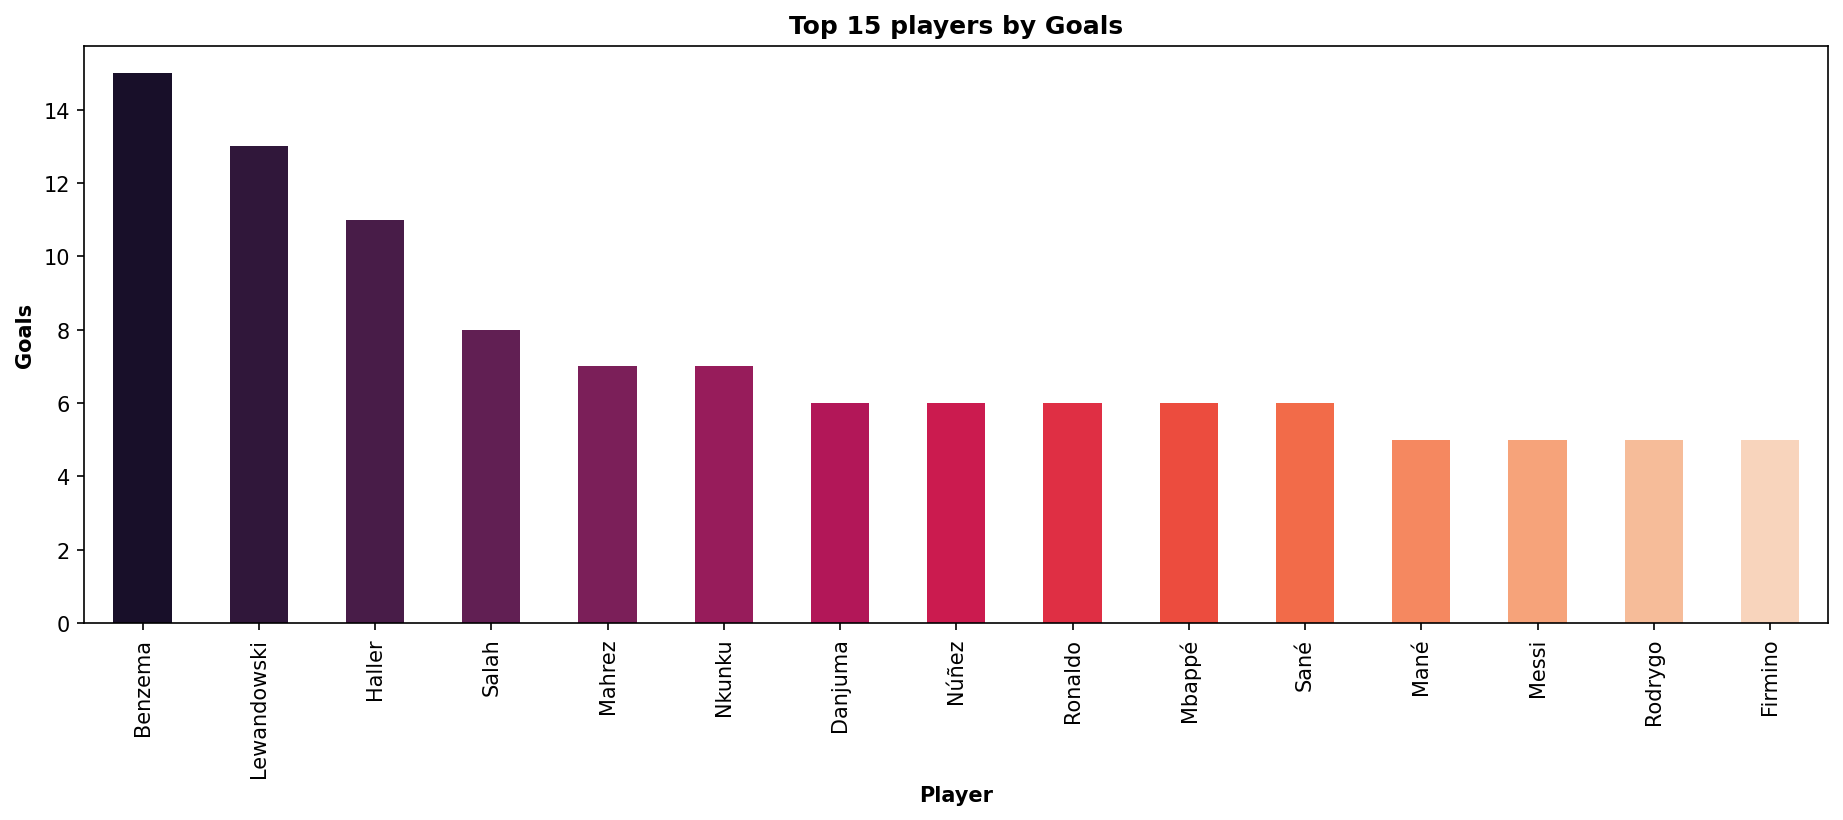

In [8]:
plt.figure(figsize = (15,5) , dpi = 150)
top15.plot(kind='bar', color =sns.color_palette("rocket", len(top15)))
plt.xlabel('Player',weight = 'bold', fontsize = 10)
plt.ylabel('Goals',weight = 'bold', fontsize = 10)
plt.title('Top 15 players by Goals',weight = 'bold', fontsize = 12)
plt.show()

In [9]:
top3 =  top15.head(3)
print("Top 3 Goalscorers: ")
for player, goals in top3.items():
    print(f"{player}: {goals} goals")

Top 3 Goalscorers: 
Benzema: 15 goals
Lewandowski: 13 goals
Haller: 11 goals


In [10]:
versatility = df[['player_name','right_foot','left_foot','headers','penalties','inside_area','outside_areas']].head(15)
versatility.set_index('player_name', inplace=True)

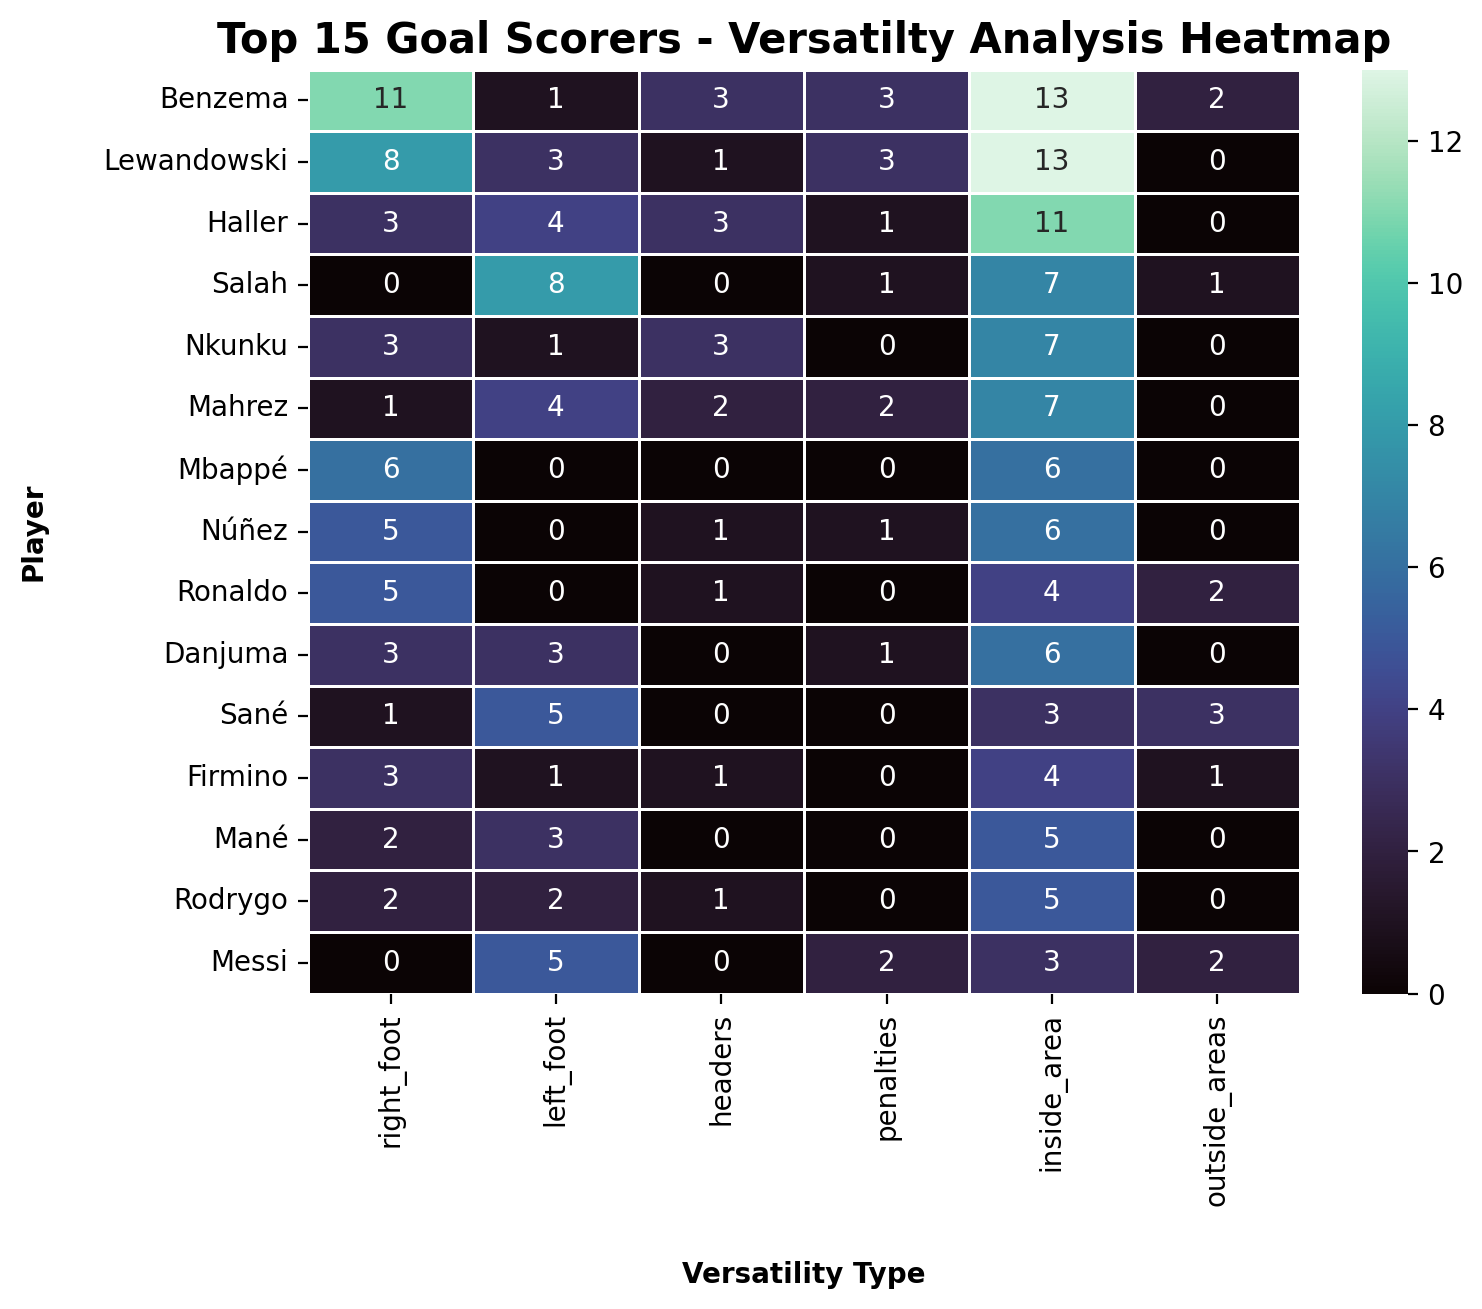

In [11]:
plt.figure(figsize=(8,6), dpi=200)
sns.heatmap(
    data = versatility,
    annot = True,
    cmap = 'mako',
    linewidths=0.5
)
plt.xlabel('Versatility Type', weight = 'bold',fontsize = 10,labelpad = 20)
plt.ylabel('Player', weight = 'bold',fontsize = 10,labelpad = 20)
plt.title('Top 15 Goal Scorers - Versatilty Analysis Heatmap', weight = 'bold', fontsize = 15)
plt.show()

In [12]:
top_players = {}
for stat in versatility.columns:
    max_value = versatility[stat].max()
    top_players[stat] = []
    for player_name, goals in versatility[stat].items():
        if goals == max_value:
            top_players[stat].append([player_name,goals])
    
for stat, players in top_players.items():
    print(f"Strongest {stat}:" ,end=" ")
    for player, goals in players:
        print(f"{player}", end=" ")
    print()

Strongest right_foot: Benzema 
Strongest left_foot: Salah 
Strongest headers: Benzema Haller Nkunku 
Strongest penalties: Benzema Lewandowski 
Strongest inside_area: Benzema Lewandowski 
Strongest outside_areas: Sané 


In [13]:
right_foot_goals = df['right_foot'].sum()
left_foot_goals = df['left_foot'].sum()
header_goals = df['headers'].sum()

In [14]:
goal_type = pd.DataFrame({
    'Category' : ['Right Foot', 'Left Foot', 'Headers'],
    'Goals' : [right_foot_goals ,left_foot_goals, header_goals]
               })

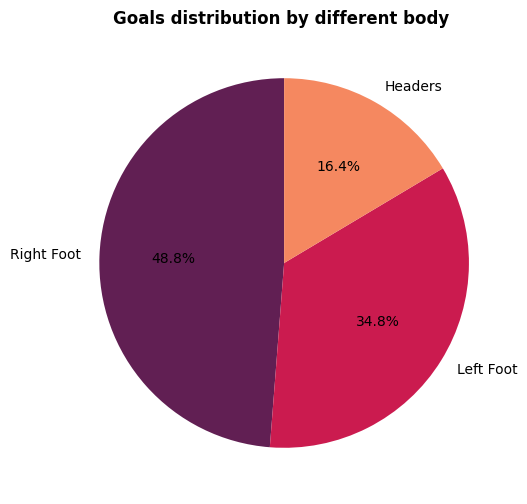

In [15]:
color_for_pie = sns.color_palette('rocket' , len(goal_type['Goals']))
plt.figure(figsize = (8,6))
plt.title('Goals distribution by different body ', weight='bold', fontsize=12)
plt.pie(goal_type['Goals'], labels = goal_type['Category'], autopct='%1.1f%%',startangle=90, colors = color_for_pie)
plt.show()

In [16]:
print("Conclusion: Right footed players have scored the majority of the goals")

Conclusion: Right footed players have scored the majority of the goals


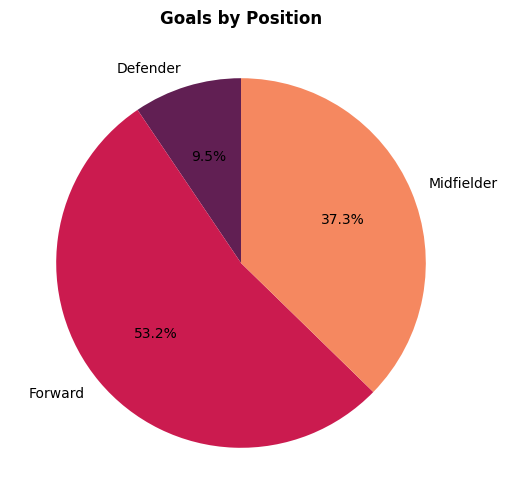

In [17]:
goals_by_position = df.groupby('position')['goals'].sum()
plt.figure(figsize = (8,6))
plt.pie(goals_by_position, labels=goals_by_position.index, autopct='%1.1f%%', startangle=90, colors = color_for_pie)
plt.title('Goals by Position', fontsize = 12, weight = 'bold')
plt.show()

In [18]:
print("Conclusion: The forwards have scored the majority of the goals")

Conclusion: The forwards have scored the majority of the goals


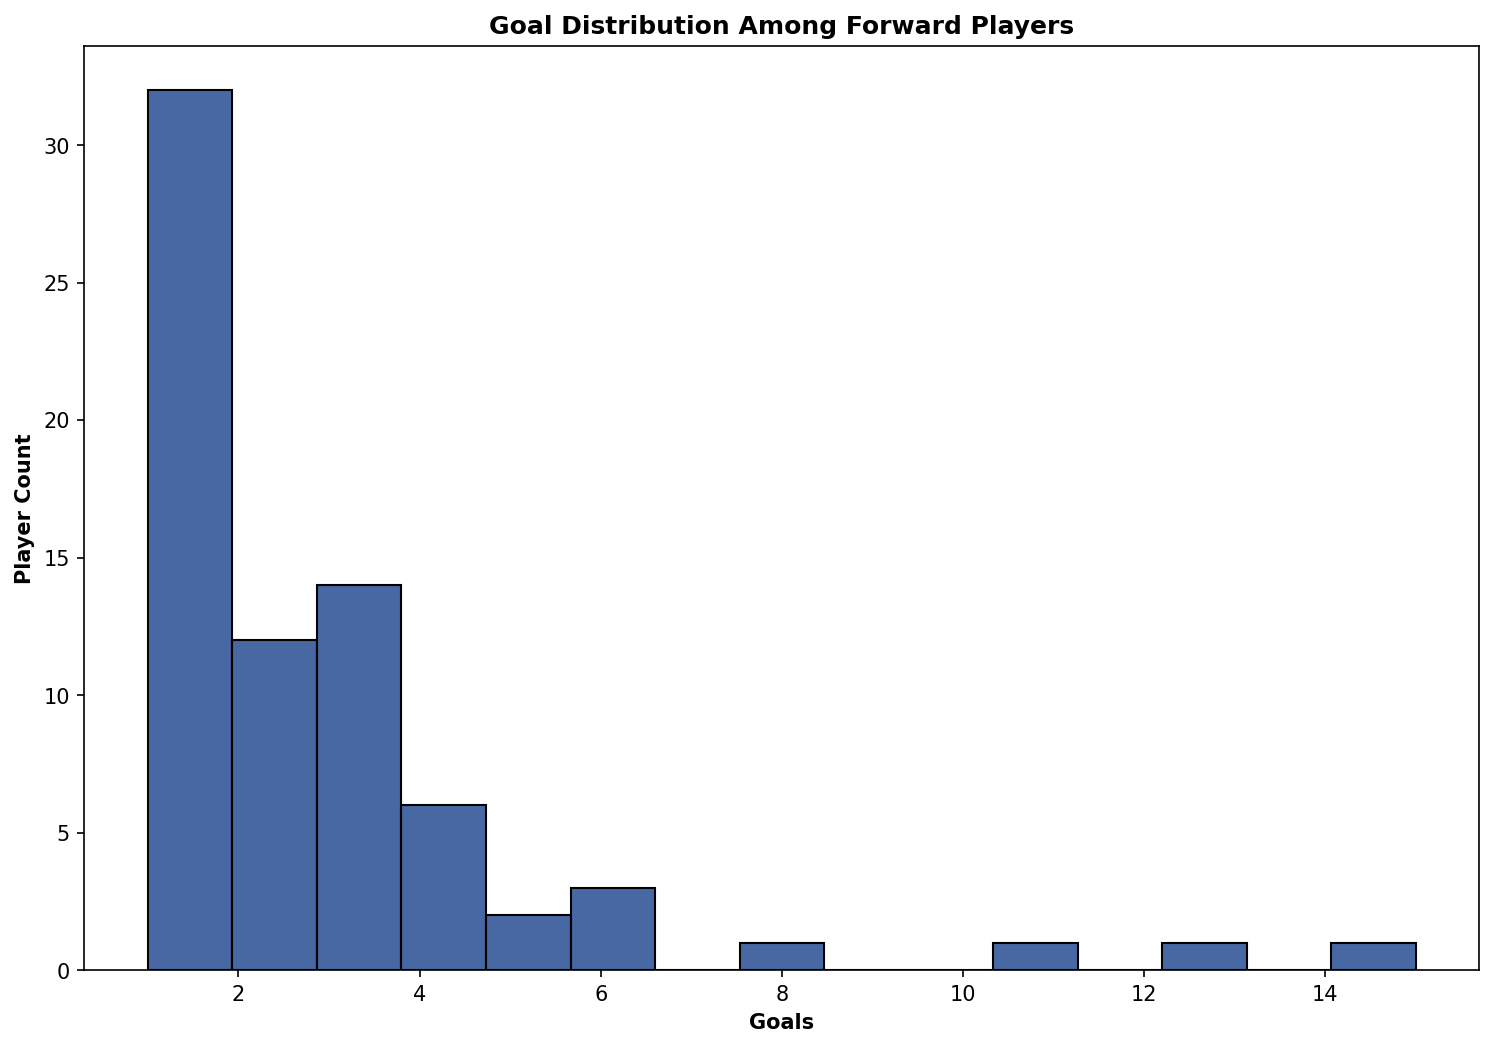

In [19]:
plt.figure(figsize=(12,8), dpi = 150)
sns.histplot(x = df[df['position'] == 'Forward']['goals'], color='#093685')
plt.xlabel('Goals', weight='bold', fontsize=10)
plt.ylabel('Player Count', weight='bold', fontsize=10)
plt.title('Goal Distribution Among Forward Players', weight='bold', fontsize=12)
plt.show()

In [20]:
print("Conclusion: Most of the forwards scored 1 goal.")

Conclusion: Most of the forwards scored 1 goal.


In [21]:
goals_by_area = pd.DataFrame({
    'Category' : ['Inside Area' ,'Outside Area', 'Penalties'],
    'Goals' : [df['inside_area'].sum(),df['outside_areas'].sum(),df['penalties'].sum()]
               })

In [22]:
goals_by_area

,Category,Goals
0,Inside Area,332
1,Outside Area,38
2,Penalties,36


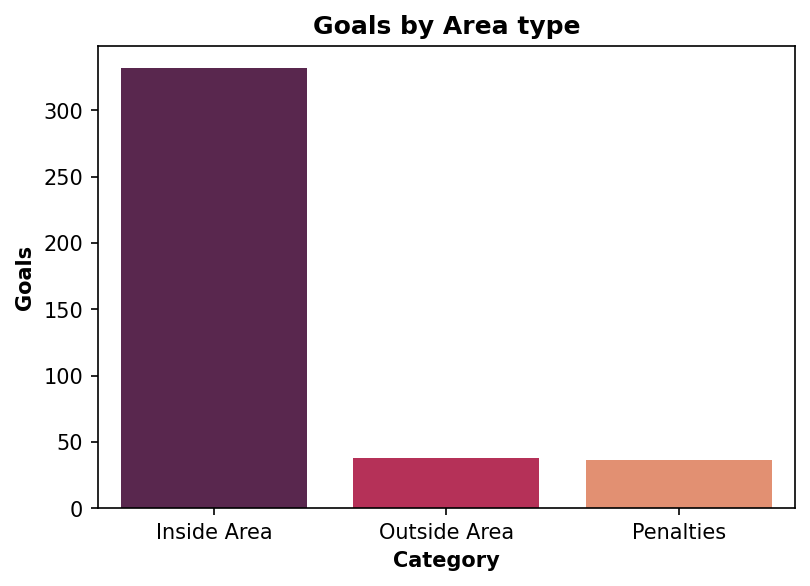

In [23]:
plt.figure(figsize=(6,4), dpi = 150)
sns.barplot(x = goals_by_area['Category'], y = goals_by_area['Goals'], palette = 'rocket', hue = goals_by_area['Category'] )
plt.xlabel('Category',weight='bold', fontsize = 10)
plt.ylabel('Goals',weight='bold', fontsize = 10)
plt.title('Goals by Area type', weight = 'bold' , fontsize=12)
plt.show()


In [24]:
print("Conclusion: The vast majority of the goals were scored from inside the penalty box")

Conclusion: The vast majority of the goals were scored from inside the penalty box


In [25]:
df_attempts = pd.read_csv('attempts.csv')

In [26]:
df_attempts.head()

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,4,Sané,Bayern,Midfielder,33,13,12,8,10
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10


In [27]:
df_attempts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   serial          546 non-null    int64 
 1   player_name     546 non-null    object
 2   club            546 non-null    object
 3   position        546 non-null    object
 4   total_attempts  546 non-null    int64 
 5   on_target       546 non-null    int64 
 6   off_target      546 non-null    int64 
 7   blocked         546 non-null    int64 
 8   match_played    546 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.5+ KB


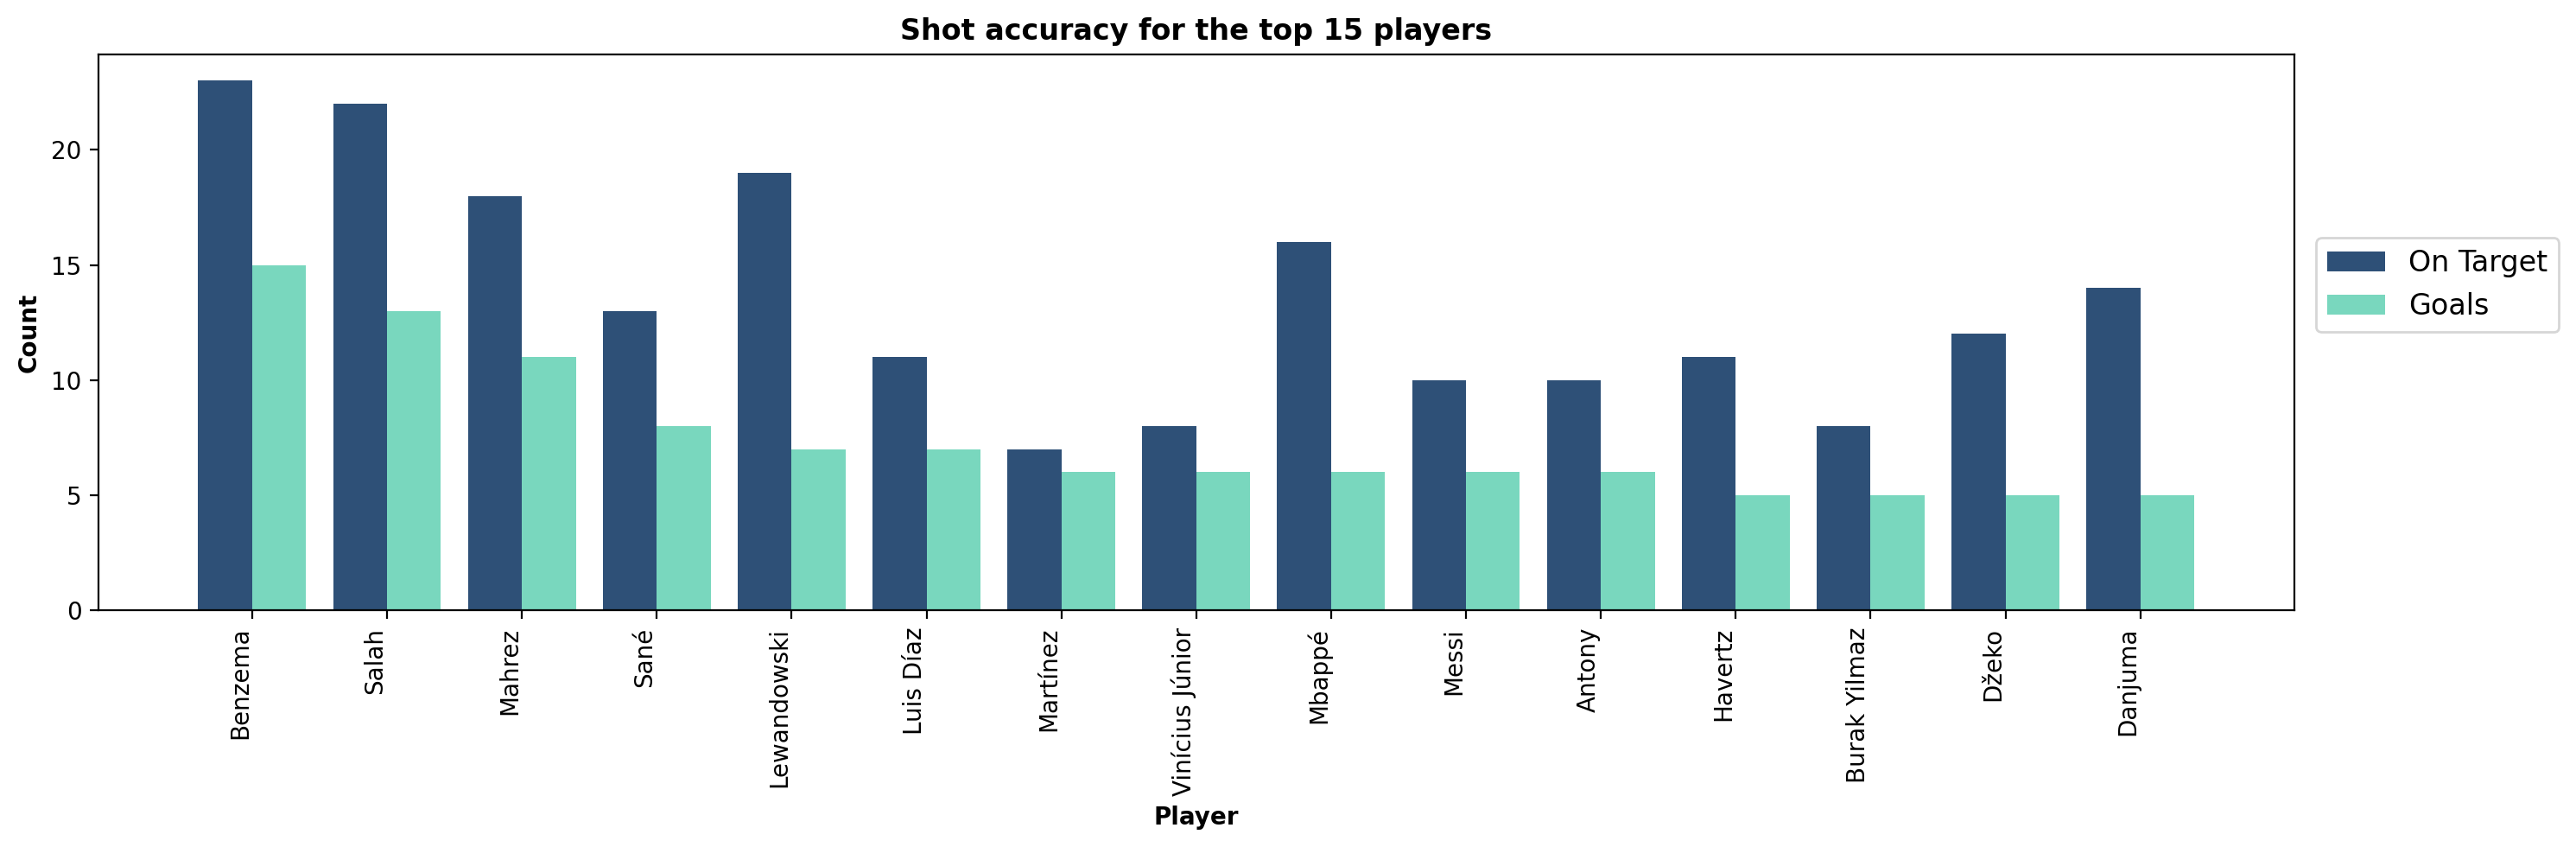

In [28]:
top_15_attempted = df_attempts.sort_values(by='total_attempts', ascending=False).head(15)

plt.figure(figsize = (15,5), dpi = 200)
plt.title('Shot accuracy for the top 15 players' , weight = 'bold' , fontsize = 12)

width = 0.4
x = np.arange(len(top15))

plt.bar(x - width/2, top_15_attempted['on_target'],width, color = '#2E5077', label = 'On Target')
plt.bar(x + width/2, top15, width, color = '#79D7BE' , label = 'Goals')
plt.xlabel('Player', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xticks(ticks = x, labels = top_15_attempted['player_name'], fontsize = 10, rotation = 90, ha='right')

plt.legend(fontsize=12, loc = (1.01, 0.5))

plt.tight_layout()
plt.show()

In [29]:
print("Benzema, Salah and Mahrez are the players with the best shot accuracy")

Benzema, Salah and Mahrez are the players with the best shot accuracy


In [30]:
shot_accuracy = df_attempts[['on_target', 'off_target', 'blocked']].sum()

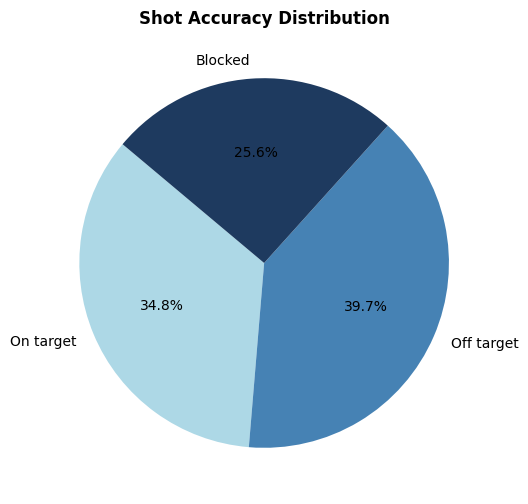

In [31]:
plt.figure(figsize = (8,6))
plt.title('Shot Accuracy Distribution' , fontsize = 12, weight = 'bold')
plt.pie(shot_accuracy, labels=['On target', 'Off target', 'Blocked'], autopct='%1.1f%%', startangle=140, colors = ["#ADD8E6", "#4682B4", "#1E3A5F"])
plt.show()

In [32]:
print("Conslusion: Most of the shots were off target.")

Conslusion: Most of the shots were off target.


In [33]:
key_stats = pd.read_csv('key_stats.csv')

In [34]:
club_summary = key_stats.groupby('club').agg({
    'goals' : 'sum',
    'assists' : 'sum',
    'match_played' : 'sum'
})
    

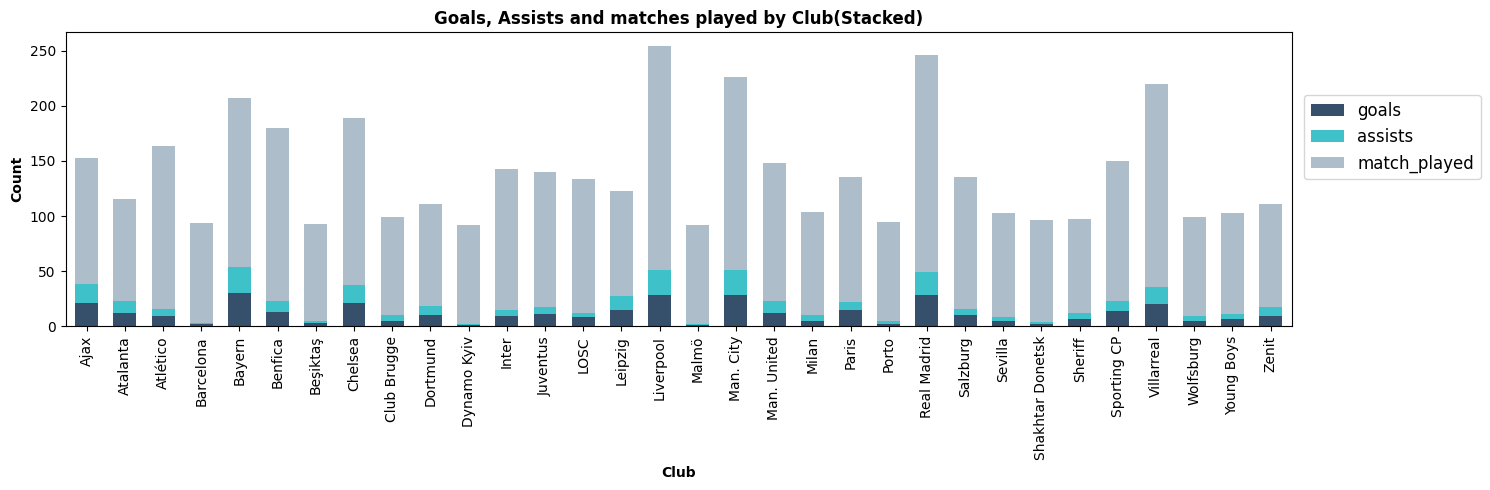

In [35]:
club_summary.plot(
    kind='bar', 
    stacked=True,
    figsize = (15,5),
    width = 0.6,
    color = ['#364F6B', '#3FC1C9', '#AEBDCA']
)
plt.title('Goals, Assists and matches played by Club(Stacked)', fontsize = 12, weight = 'bold')
plt.xlabel('Club',weight='bold',fontsize=10)
plt.ylabel('Count',weight='bold',fontsize=10)
plt.xticks(rotation = 90)
plt.legend(fontsize=12,loc = (1.01,0.5))
plt.tight_layout()
plt.show()

In [36]:
key_stats.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [37]:
most_assists = key_stats.nlargest(15,'assists')[['player_name','assists']]

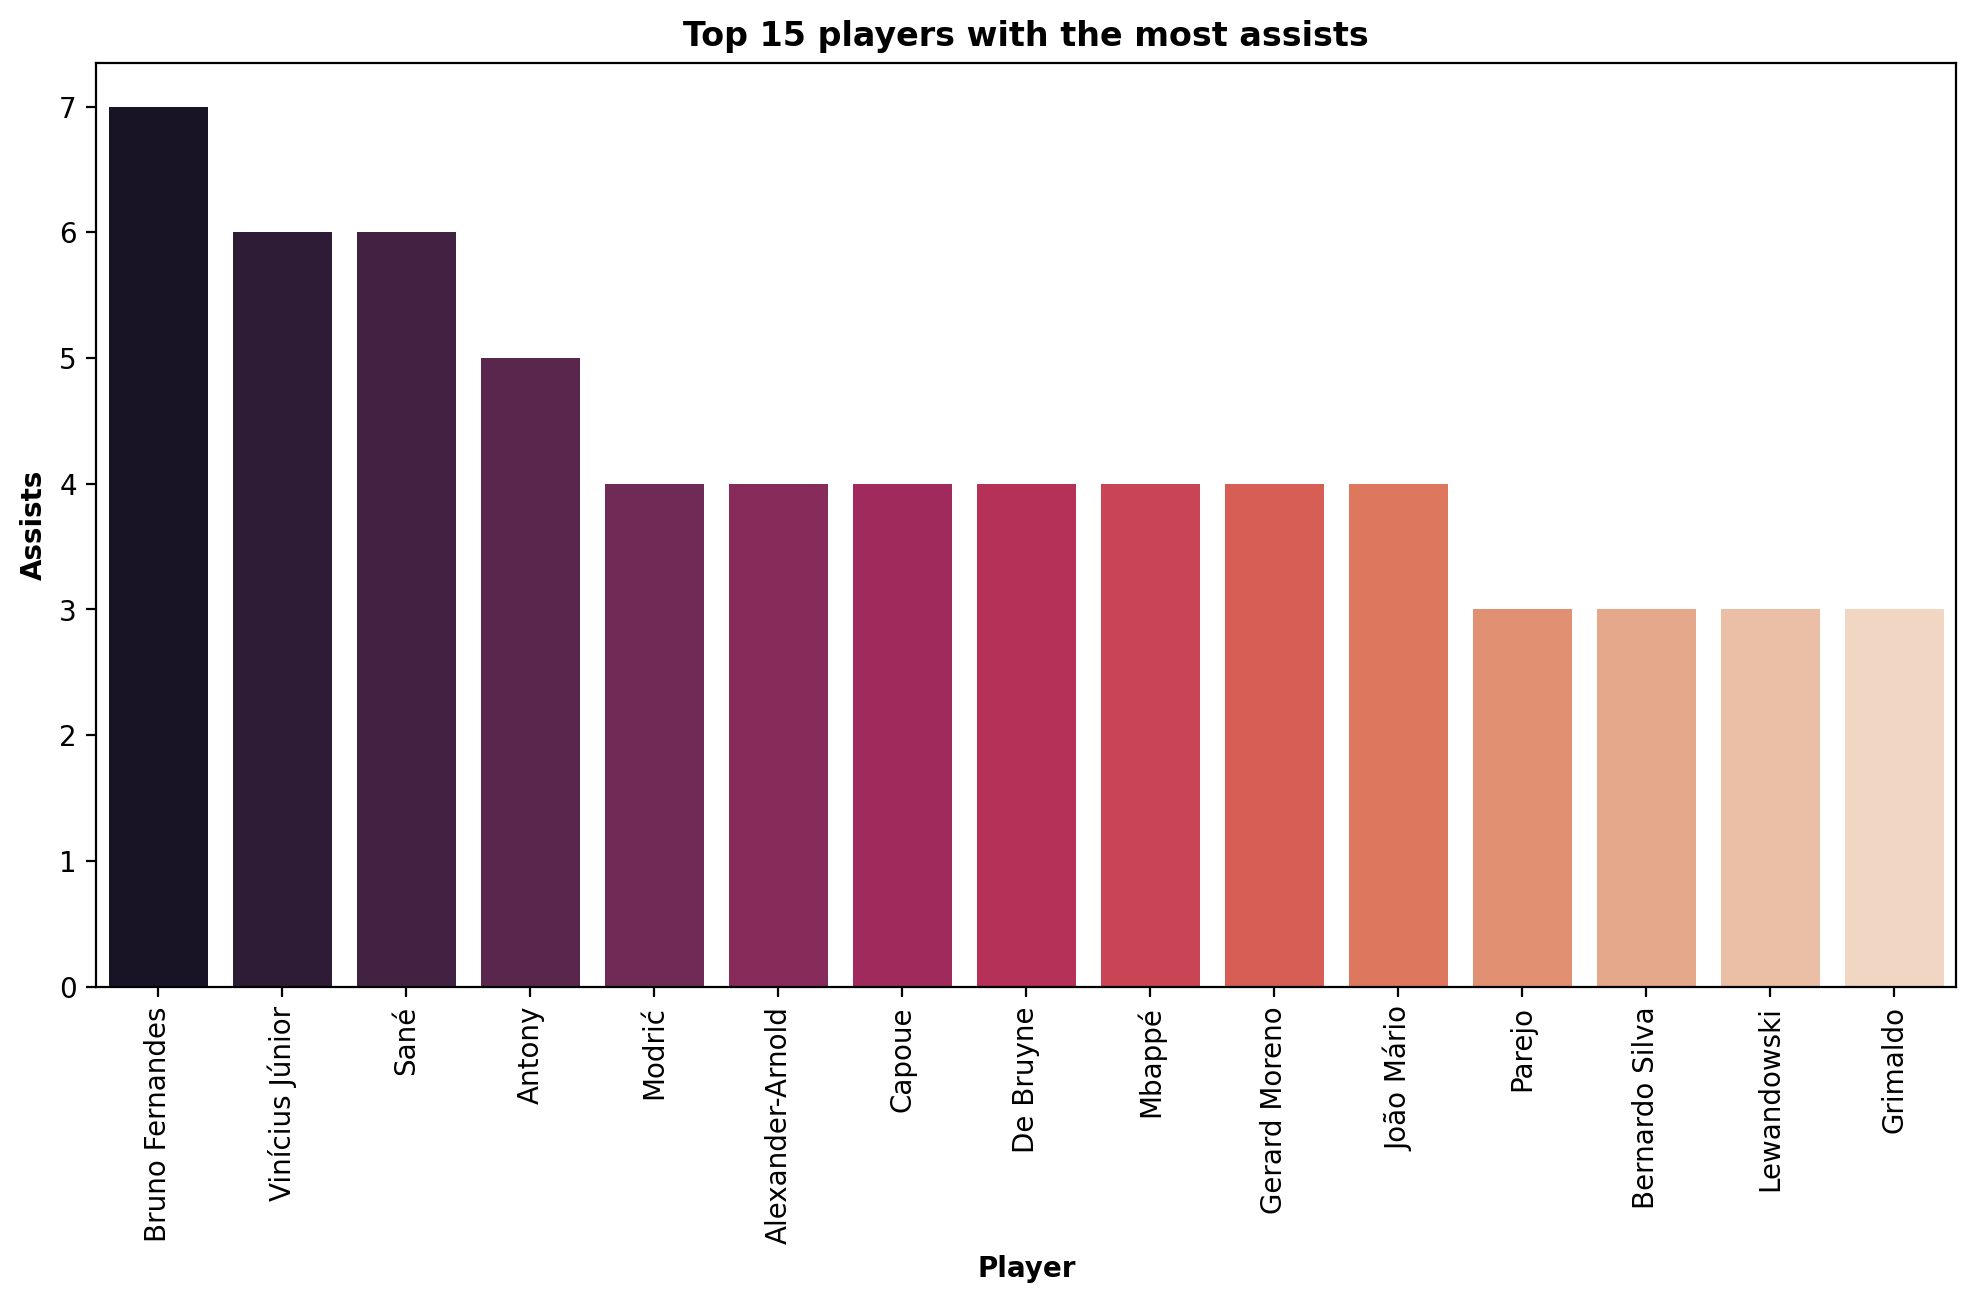

In [38]:
plt.figure(figsize=(12,6),dpi = 200)
sns.barplot(data = most_assists, x = 'player_name', y = 'assists',hue = 'player_name', palette = 'rocket',legend = False)
plt.title('Top 15 players with the most assists', fontsize = 12, weight = 'bold')

plt.xlabel('Player' , fontsize = 10 , weight = 'bold')
plt.ylabel('Assists' , fontsize = 10 , weight = 'bold')
plt.xticks(rotation = 90)
plt.show()

In [39]:
print("Top 5 players with the most Assists: ")

Top 5 players with the most Assists: 


In [40]:
most_assists_top5 = most_assists.head(5).reset_index(drop=True)
most_assists_top5.index = most_assists_top5.index + 1
most_assists_top5

,player_name,assists
1,Bruno Fernandes,7
2,Vinícius Júnior,6
3,Sané,6
4,Antony,5
5,Modrić,4


In [41]:
most_assists

,player_name,assists
196,Bruno Fernandes,7
1,Vinícius Júnior,6
76,Sané,6
138,Antony,5
3,Modrić,4
31,Alexander-Arnold,4
56,Capoue,4
81,De Bruyne,4
99,Mbappé,4
192,Gerard Moreno,4


In [42]:
assist_g_a = key_stats.sort_values(by=['assists', 'goals'], ascending = [False, False])
assist_g_a = assist_g_a[assist_g_a['goals'] != 0 ]
top15_ga = assist_g_a.head(15)

In [43]:
top15_ga

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
76,Sané,Bayern,Midfielder,798,10,6,6,94
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
138,Antony,Ajax,Forward,577,7,2,5,65.1
99,Mbappé,Paris,Forward,673,8,6,4,65.2
56,Capoue,Villarreal,Midfielder,1046,12,2,4,130.9
81,De Bruyne,Man. City,Midfielder,734,10,2,4,95.5
192,Gerard Moreno,Villarreal,Forward,524,7,2,4,65.7
66,Lewandowski,Bayern,Forward,876,10,13,3,99.7
78,Müller,Bayern,Forward,778,10,4,3,98.5
65,Bernardo Silva,Man. City,Midfielder,878,11,3,3,120.3


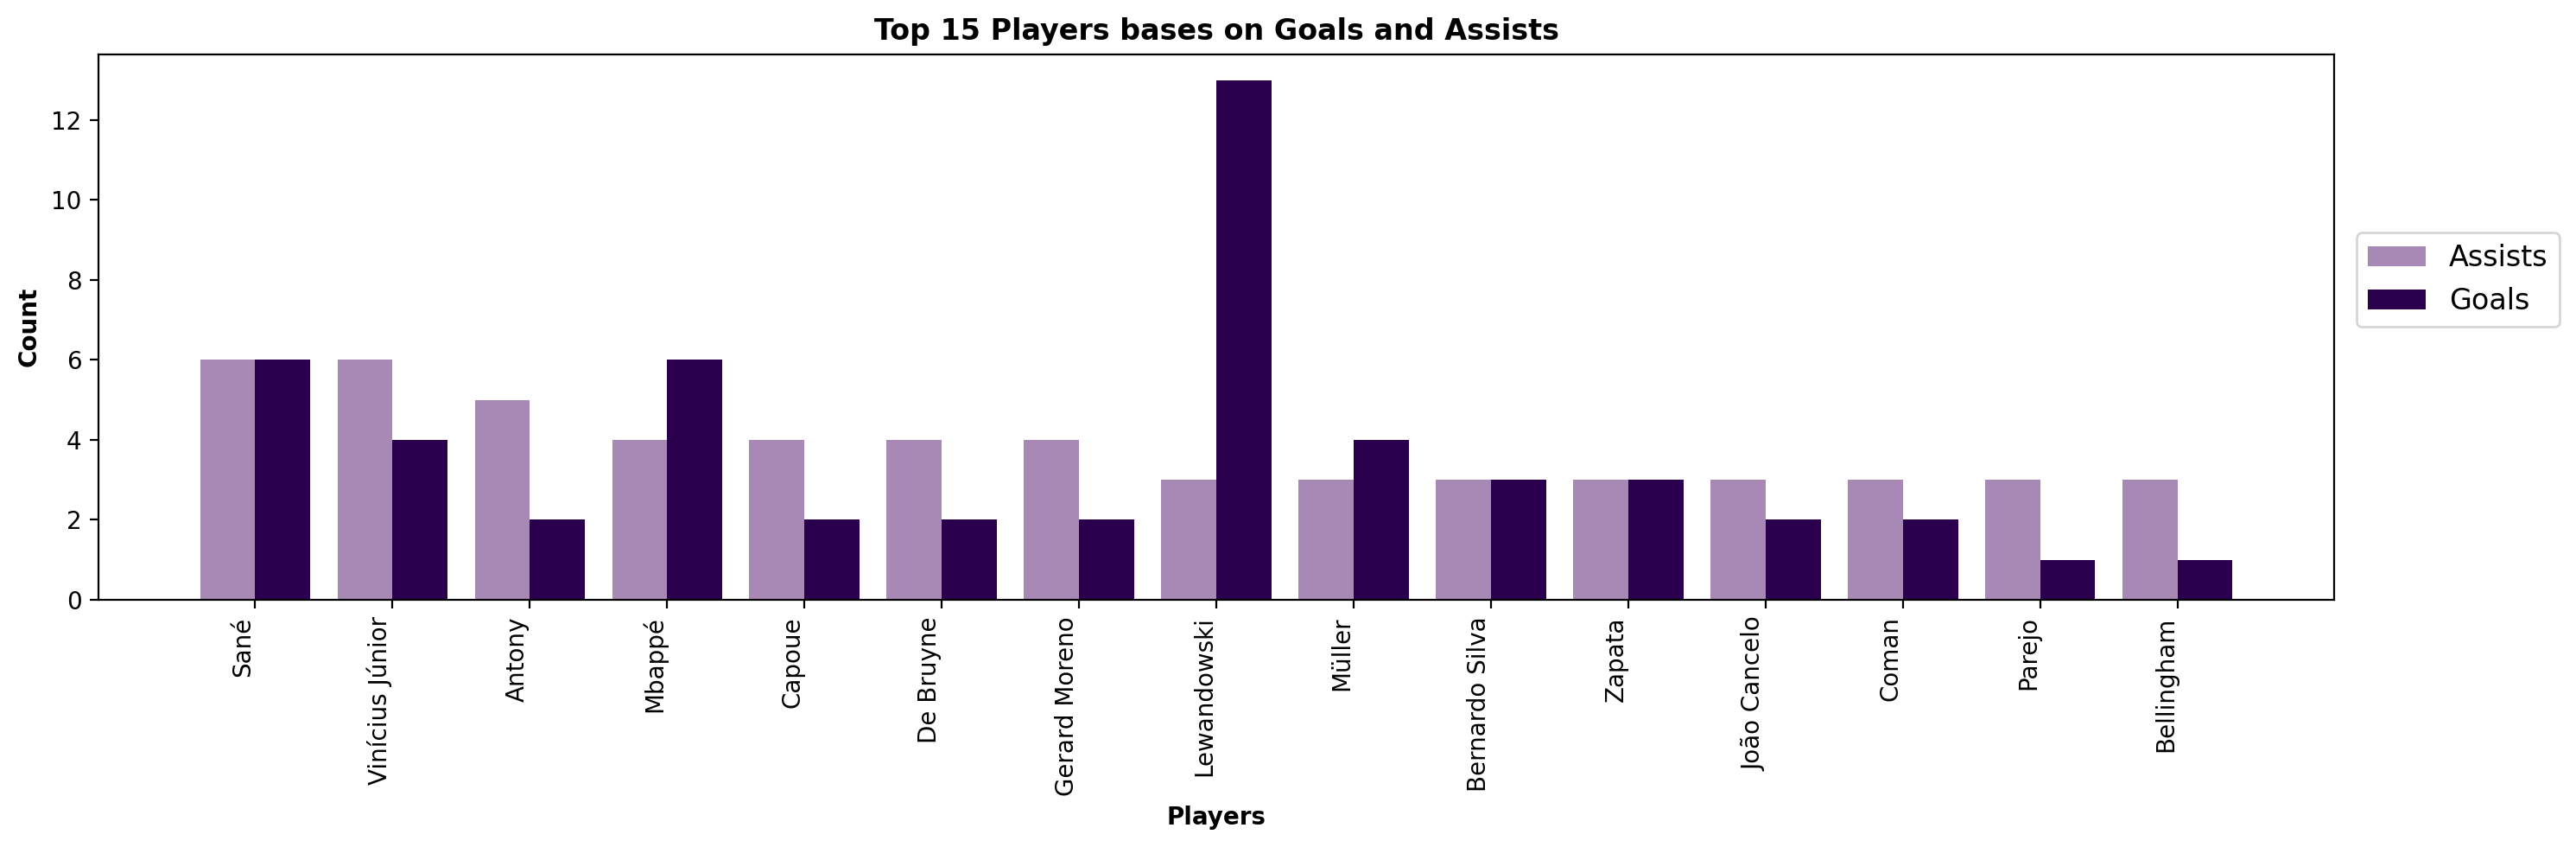

In [44]:
plt.figure(figsize = (15,5) , dpi=200)
plt.title('Top 15 Players bases on Goals and Assists',fontsize=12,weight='bold')
width = 0.4
x = np.arange(len(top15_ga))
plt.bar(x - width/2, top15_ga['assists'],width, color = '#A888B5', label = 'Assists')
plt.bar(x + width/2, top15_ga['goals'], width, color = '#2A004E' , label = 'Goals')
plt.xlabel('Players', fontsize=10, weight='bold') 
plt.ylabel('Count', fontsize=10, weight='bold') 
plt.xticks(ticks = x, labels = top15_ga['player_name'], fontsize=10,ha ='right', rotation = 90)
plt.legend(fontsize = 12 , loc = (1.01,0.5))
plt.tight_layout()
plt.show()

In [45]:
assists_by_position = key_stats.groupby('position')['assists'].sum()
assists_by_position

position
Defender       69
Forward        81
Goalkeeper      1
Midfielder    130
Name: assists, dtype: int64

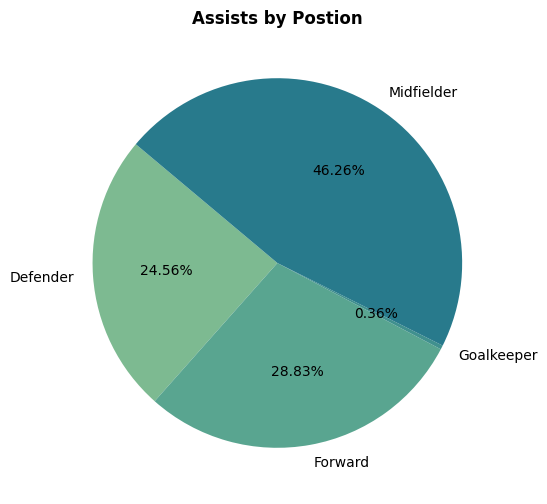

In [46]:
plt.figure(figsize = (8,6))
plt.title('Assists by Postion' , fontsize = 12, weight = 'bold')
plt.pie(assists_by_position,labels = assists_by_position.index, autopct='%1.2f%%', startangle=140, colors = sns.color_palette(palette='crest'))
plt.show()

In [47]:
print("Conclusion: Midfielders lead the assist counter.")

Conclusion: Midfielders lead the assist counter.


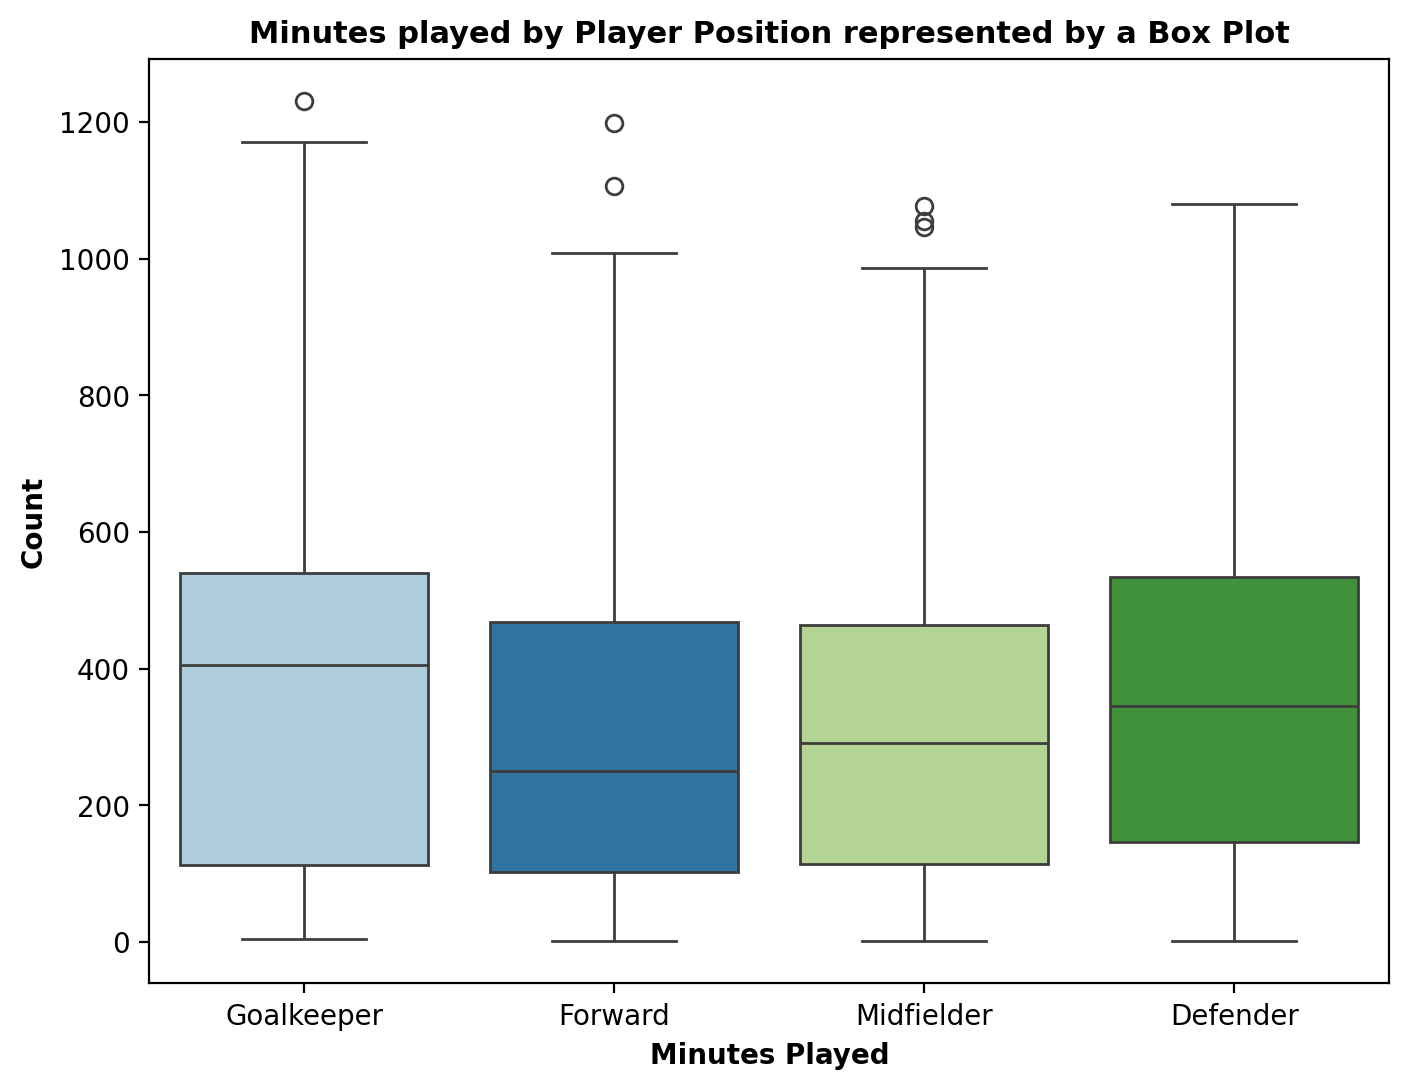

In [48]:
plt.figure(figsize = (8,6), dpi = 200)
sns.boxplot(y = key_stats['minutes_played'], x =  key_stats['position'], palette = 'Paired', hue = key_stats['position'])
plt.title('Minutes played by Player Position represented by a Box Plot', fontsize = 11, weight = 'bold')
plt.xlabel('Minutes Played', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.show()

In [49]:
dist_df = pd.read_csv('distributon.csv')

In [50]:
dist_df.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8


In [51]:
club_contribs = dist_df.groupby('club' , as_index=False).sum()[['club','pass_completed','cross_complted','freekicks_taken']]

In [52]:
club_contribs

,club,pass_completed,cross_complted,freekicks_taken
0,Ajax,3941,54,94
1,Atalanta,2404,31,88
2,Atlético,2755,26,127
3,Barcelona,3074,30,84
4,Bayern,5451,58,114
5,Benfica,3002,36,173
6,Beşiktaş,2021,19,79
7,Chelsea,5694,68,110
8,Club Brugge,1692,17,72
9,Dortmund,2653,22,60


In [53]:
club_contribs['Total Contribution'] = (
    club_contribs['pass_completed'] +
    club_contribs['cross_complted'] +
    club_contribs['freekicks_taken'] 
)

In [54]:
club_contribs = club_contribs.sort_values(by= 'Total Contribution' , ascending = False)

In [55]:
club_contribs['Label'] = (
    club_contribs['club'] + '\n' +
    'Pass: ' + club_contribs['pass_completed'].astype(str) + '\n' +
    'Crosses: ' + club_contribs['cross_complted'].astype(str) + '\n' +
    'Freekicks Taken: ' + club_contribs['freekicks_taken'].astype(str) 
)

In [56]:
club_contribs.head()

,club,pass_completed,cross_complted,freekicks_taken,Total Contribution,Label
15,Liverpool,7103,69,170,7342,Liverpool\nPass: 7103\nCrosses: 69\nFreekicks ...
17,Man. City,6781,53,147,6981,Man. City\nPass: 6781\nCrosses: 53\nFreekicks ...
22,Real Madrid,6513,46,180,6739,Real Madrid\nPass: 6513\nCrosses: 46\nFreekick...
7,Chelsea,5694,68,110,5872,Chelsea\nPass: 5694\nCrosses: 68\nFreekicks Ta...
4,Bayern,5451,58,114,5623,Bayern\nPass: 5451\nCrosses: 58\nFreekicks Tak...


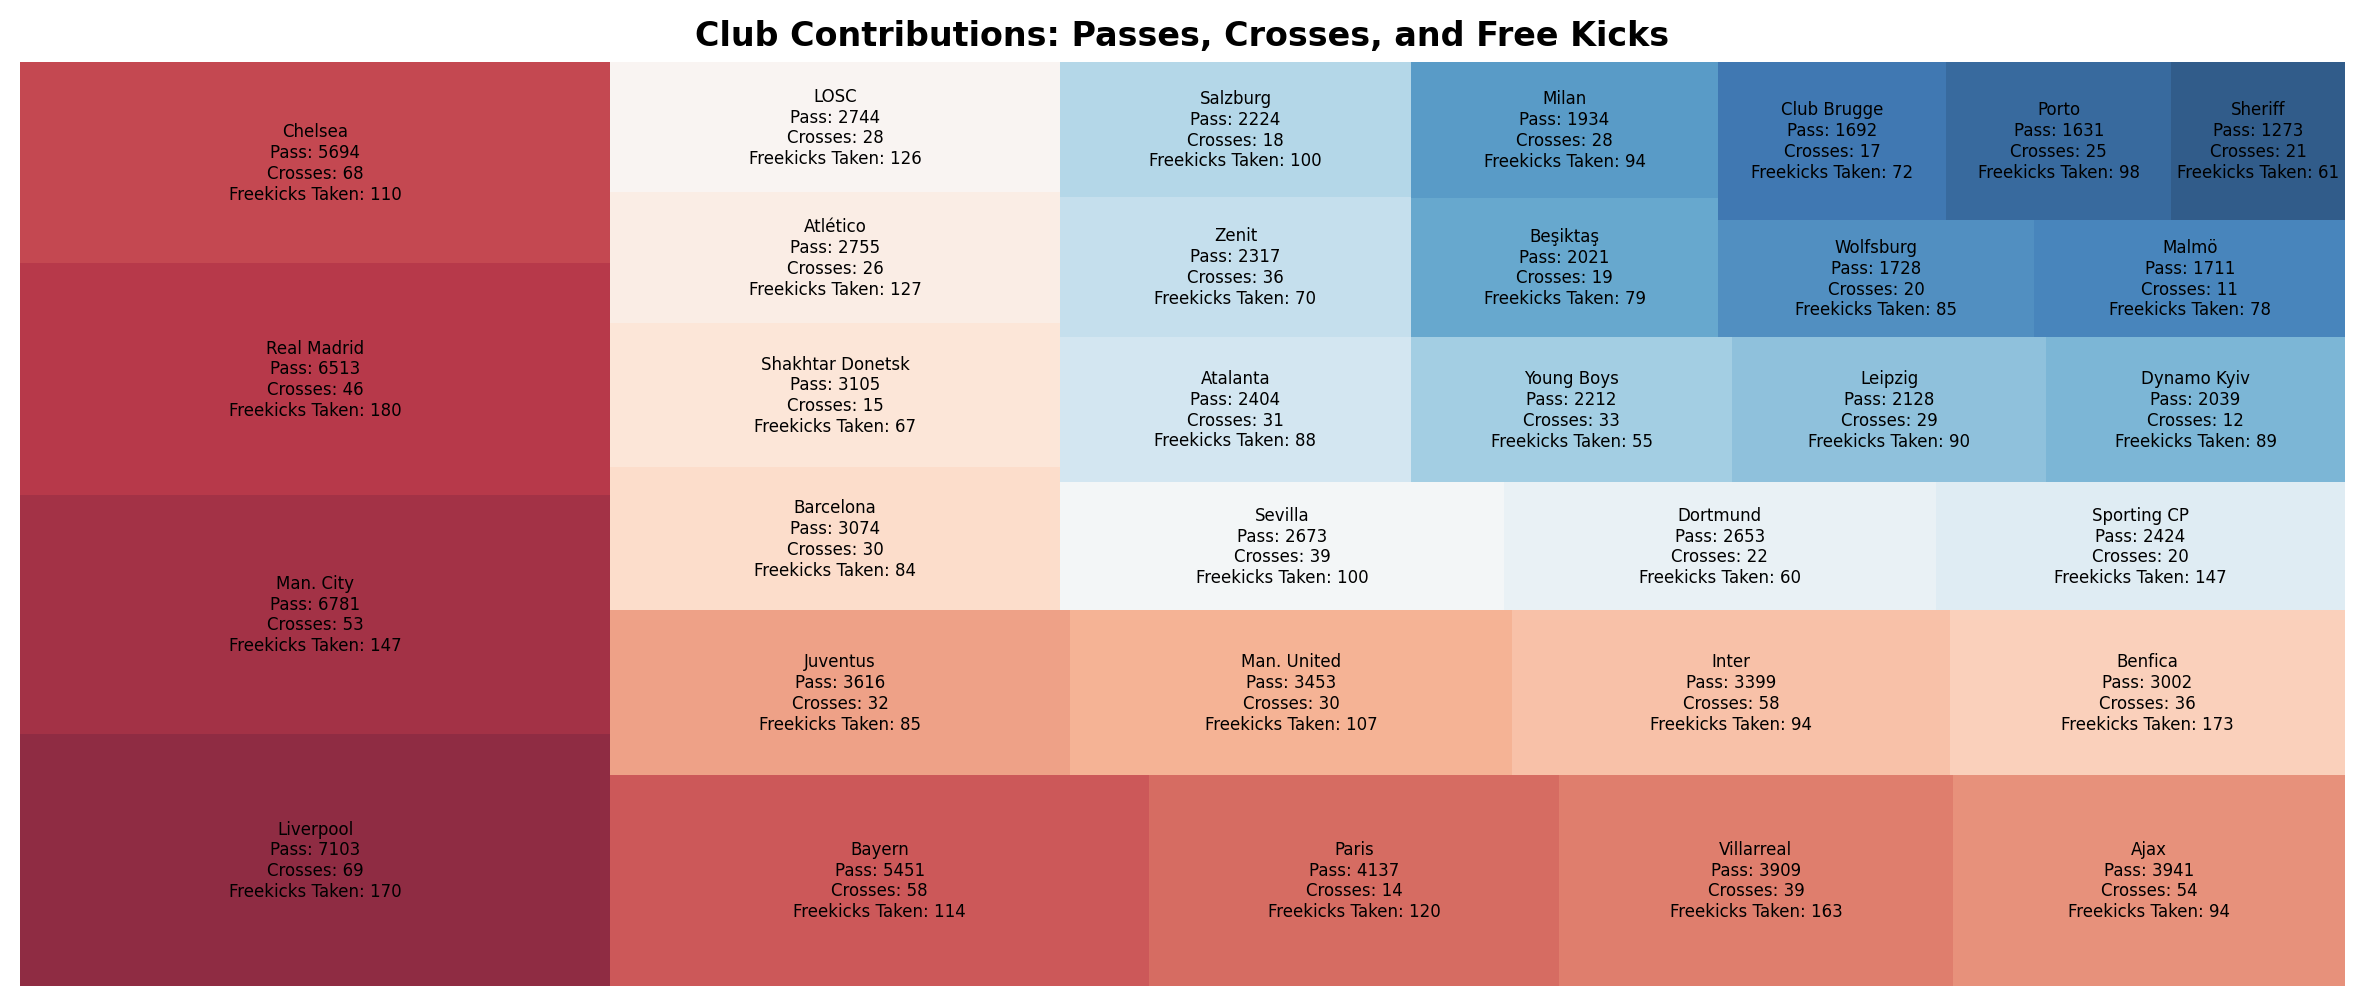

In [57]:
plt.figure(figsize = (15,6), dpi = 200)
squarify.plot(sizes = club_contribs['Total Contribution'], label = club_contribs['Label'],alpha = 0.85,  text_kwargs={'fontsize':6}, color = sns.color_palette("RdBu", len(club_contribs)))
plt.axis('off')
plt.title('Club Contributions: Passes, Crosses, and Free Kicks', fontsize=12, fontweight='bold')
plt.show()

In [58]:
print("Liverpool, Real Madrid and Manchester City are the top contenders in this category.")

Liverpool, Real Madrid and Manchester City are the top contenders in this category.


In [59]:
dist_df.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8


In [60]:
top15_passing = dist_df.sort_values(by=['pass_completed', 'pass_attempted'], ascending = [False, False]).head(15)

In [61]:
top15_passing

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
15,16,Rodri,Man. City,Midfielder,94.2,806,760,0,1,0,13,10
52,53,Kroos,Real Madrid,Midfielder,91.9,814,752,20,34,7,44,12
105,106,Modrić,Real Madrid,Midfielder,89.8,799,723,25,12,3,26,13
79,80,Rüdiger,Chelsea,Defender,90.3,750,681,0,4,0,12,9
9,9,Laporte,Man. City,Defender,94.7,707,672,0,0,0,10,9
17,18,Martínez,Ajax,Defender,94.1,674,633,0,0,0,12,8
113,114,Kimmich,Bayern,Midfielder,89.5,688,616,35,48,17,31,8
86,87,Pavard,Bayern,Defender,90.2,676,613,33,12,4,10,10
72,73,Van Dijk,Liverpool,Defender,90.7,667,609,0,1,0,10,9
43,43,Alaba,Real Madrid,Defender,92.3,657,606,11,17,2,21,12


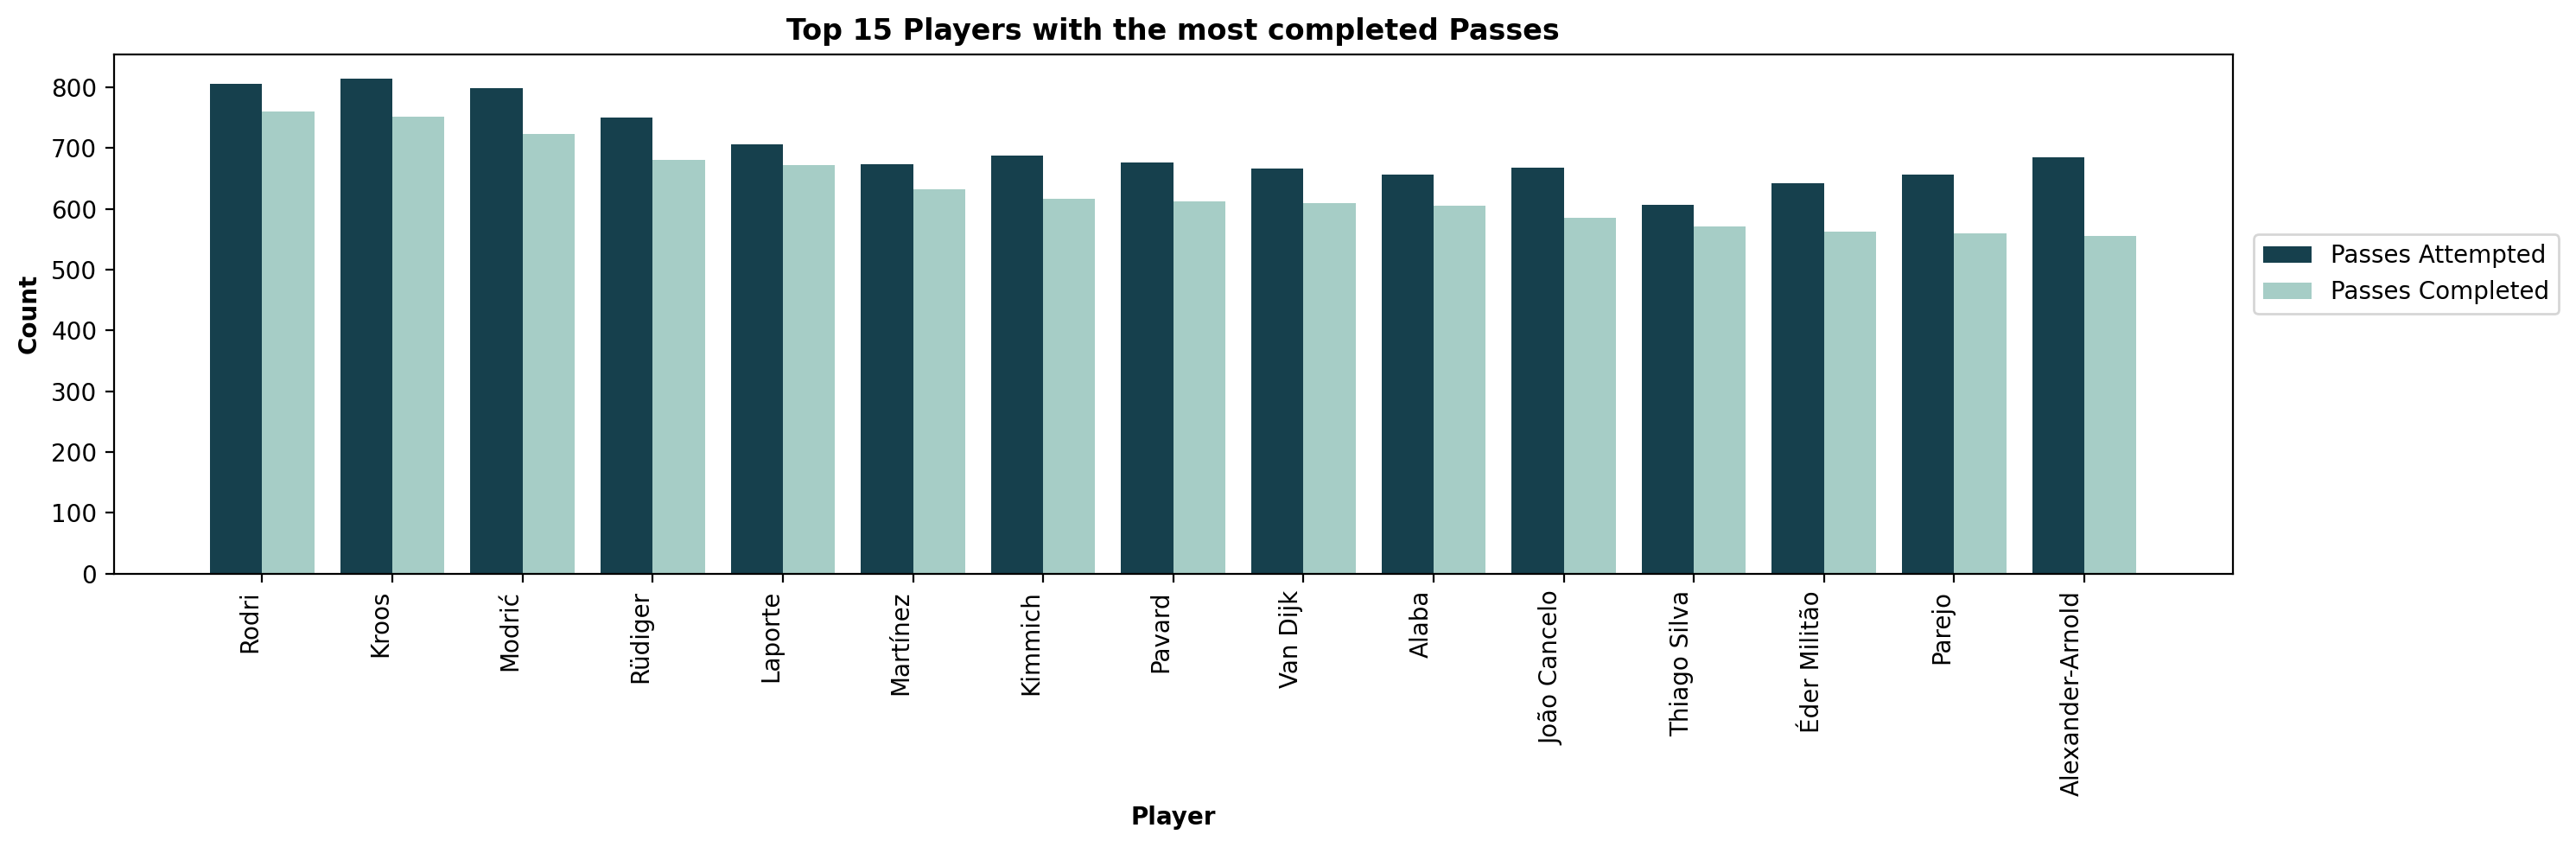

In [62]:
plt.figure(figsize = (15, 5), dpi = 200)
plt.title('Top 15 Players with the most completed Passes' , fontsize = 12, weight = 'bold')

width = 0.4
x = np.arange(len(top15_passing))
plt.bar(x - width/2, top15_passing['pass_attempted'],width, color = '#16404D', label = 'Passes Attempted')
plt.bar(x + width/2, top15_passing['pass_completed'], width, color = '#A6CDC6' , label = 'Passes Completed')
plt.xlabel('Player', fontsize = 10, weight = 'bold')
plt.ylabel('Count', fontsize = 10, weight = 'bold')
plt.xticks(ticks = x, labels = top15_passing['player_name'], ha = 'right', rotation = 90)
plt.legend(loc = (1.01,0.5), fontsize = 10)
plt.tight_layout()
plt.show()

In [63]:
print("Rodri, Kroos and Modric are the best Passers.")

Rodri, Kroos and Modric are the best Passers.


In [64]:
top15_crossing = dist_df.sort_values(by=['cross_complted', 'cross_attempted'], ascending = [False, False]).head(15)
accuracy_crosses = (top15_crossing['cross_complted'] / top15_crossing['cross_attempted']) * 100

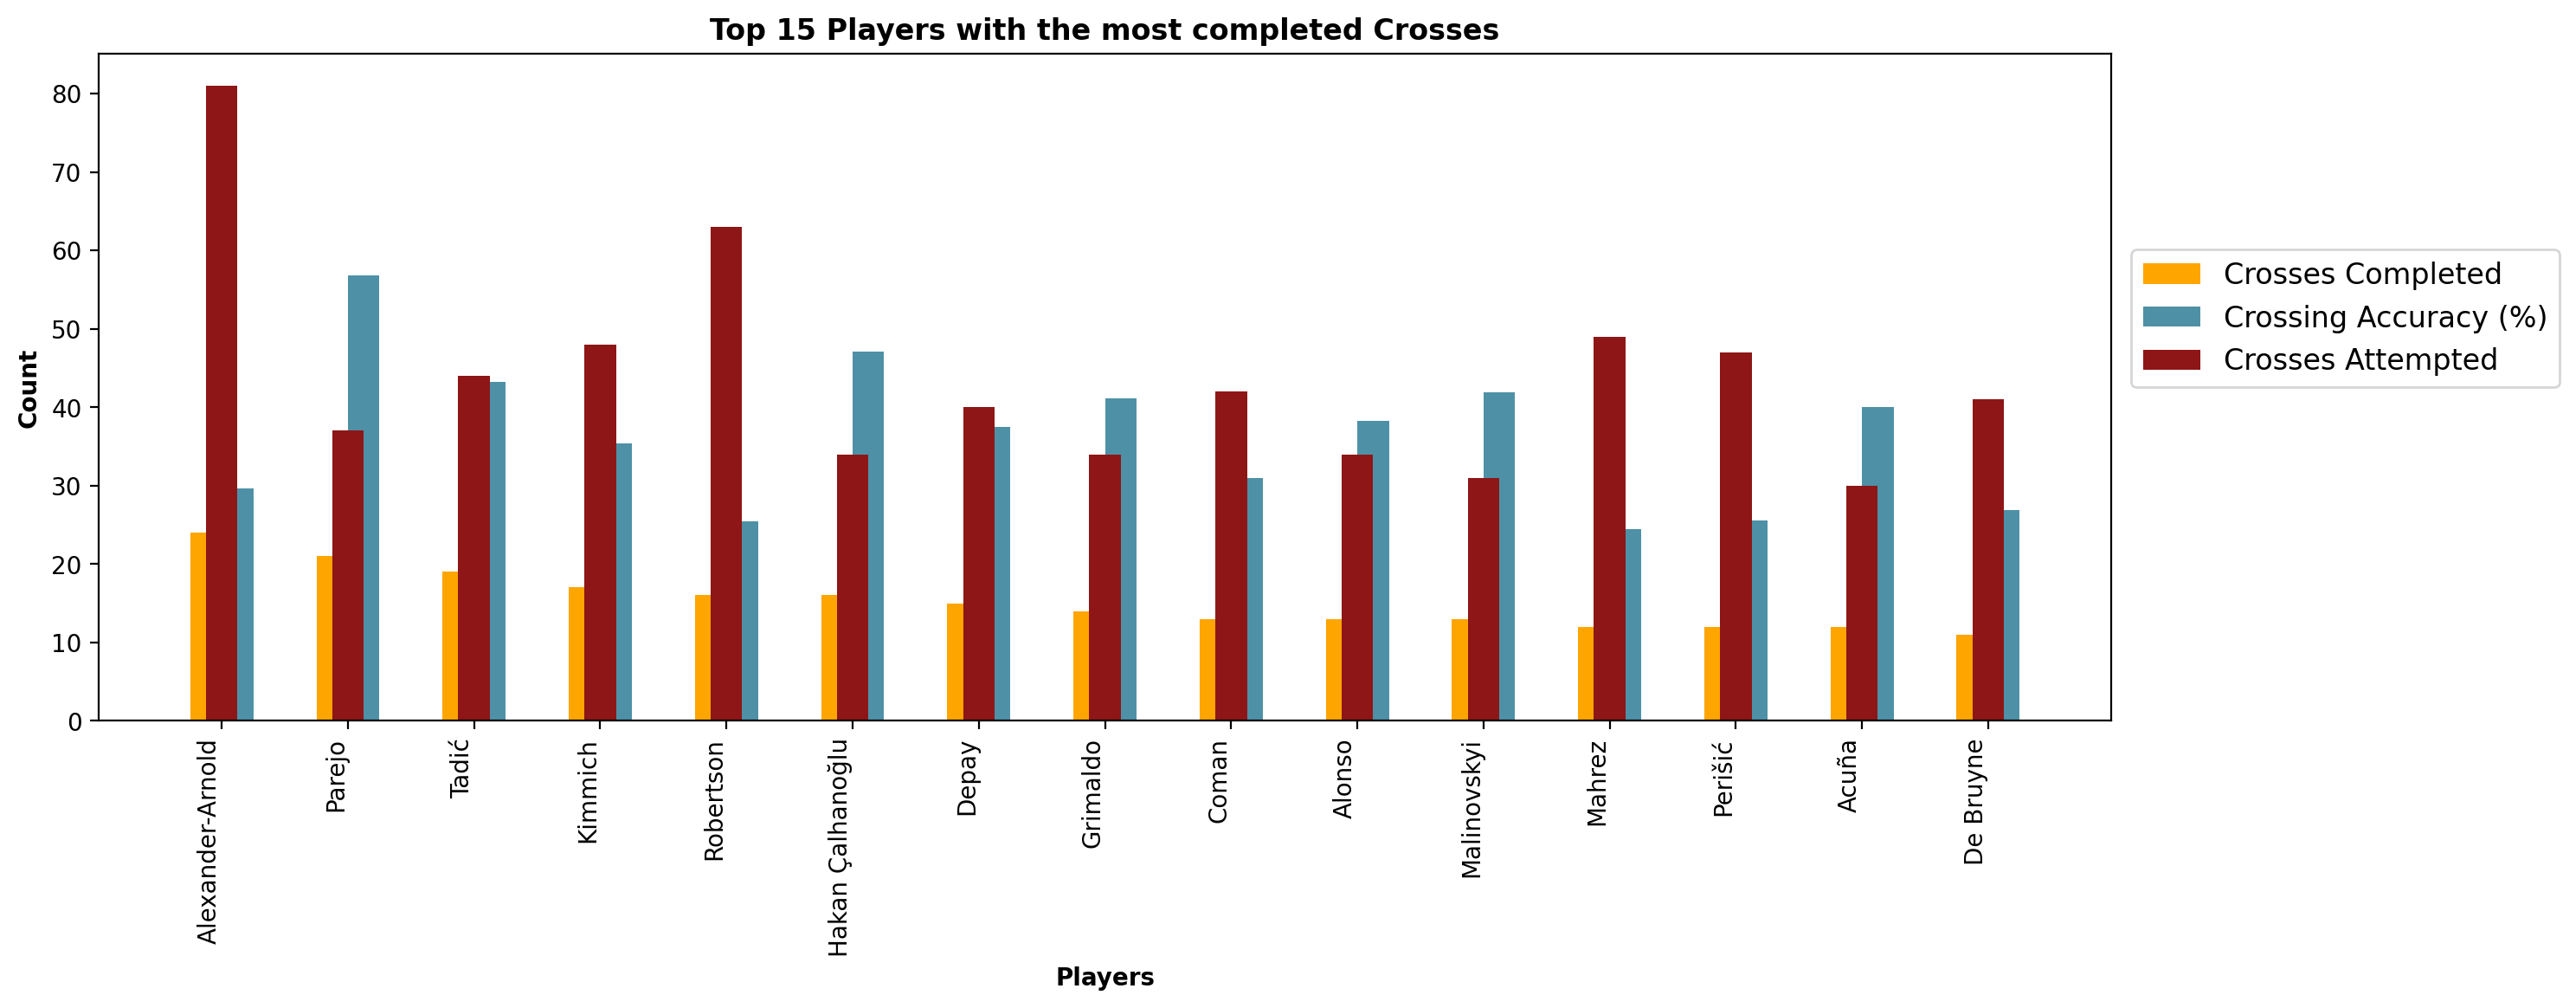

In [65]:
plt.figure(figsize =  (15,5), dpi = 200)
plt.title('Top 15 Players with the most completed Crosses', fontsize = 12, weight = 'bold')

width = 0.25
x = np.arange(len(top15_crossing))

plt.bar(x - width / 2, top15_crossing['cross_complted'], width, color = '#FFA500', label = 'Crosses Completed')
plt.bar(x + width / 2, accuracy_crosses, width, color = '#4E91A7', label = 'Crossing Accuracy (%)')
plt.bar(x, top15_crossing['cross_attempted'], width, color = '#8E1616', label = 'Crosses Attempted')
plt.xlabel('Players', fontsize = 10, weight = 'bold')
plt.ylabel('Count', fontsize = 10, weight = 'bold')
plt.xticks(ticks = x, labels = top15_crossing['player_name'], rotation = 90, ha = 'right', fontsize = 10)
plt.legend(loc = (1.01, 0.5), fontsize = 12)
plt.show()

In [66]:
print("Conclusion: The Volume of Crosses does not equal Accuracy.")

Conclusion: The Volume of Crosses does not equal Accuracy.


In [67]:
top15_freekicks = dist_df.sort_values('freekicks_taken',ascending = False).head(15)

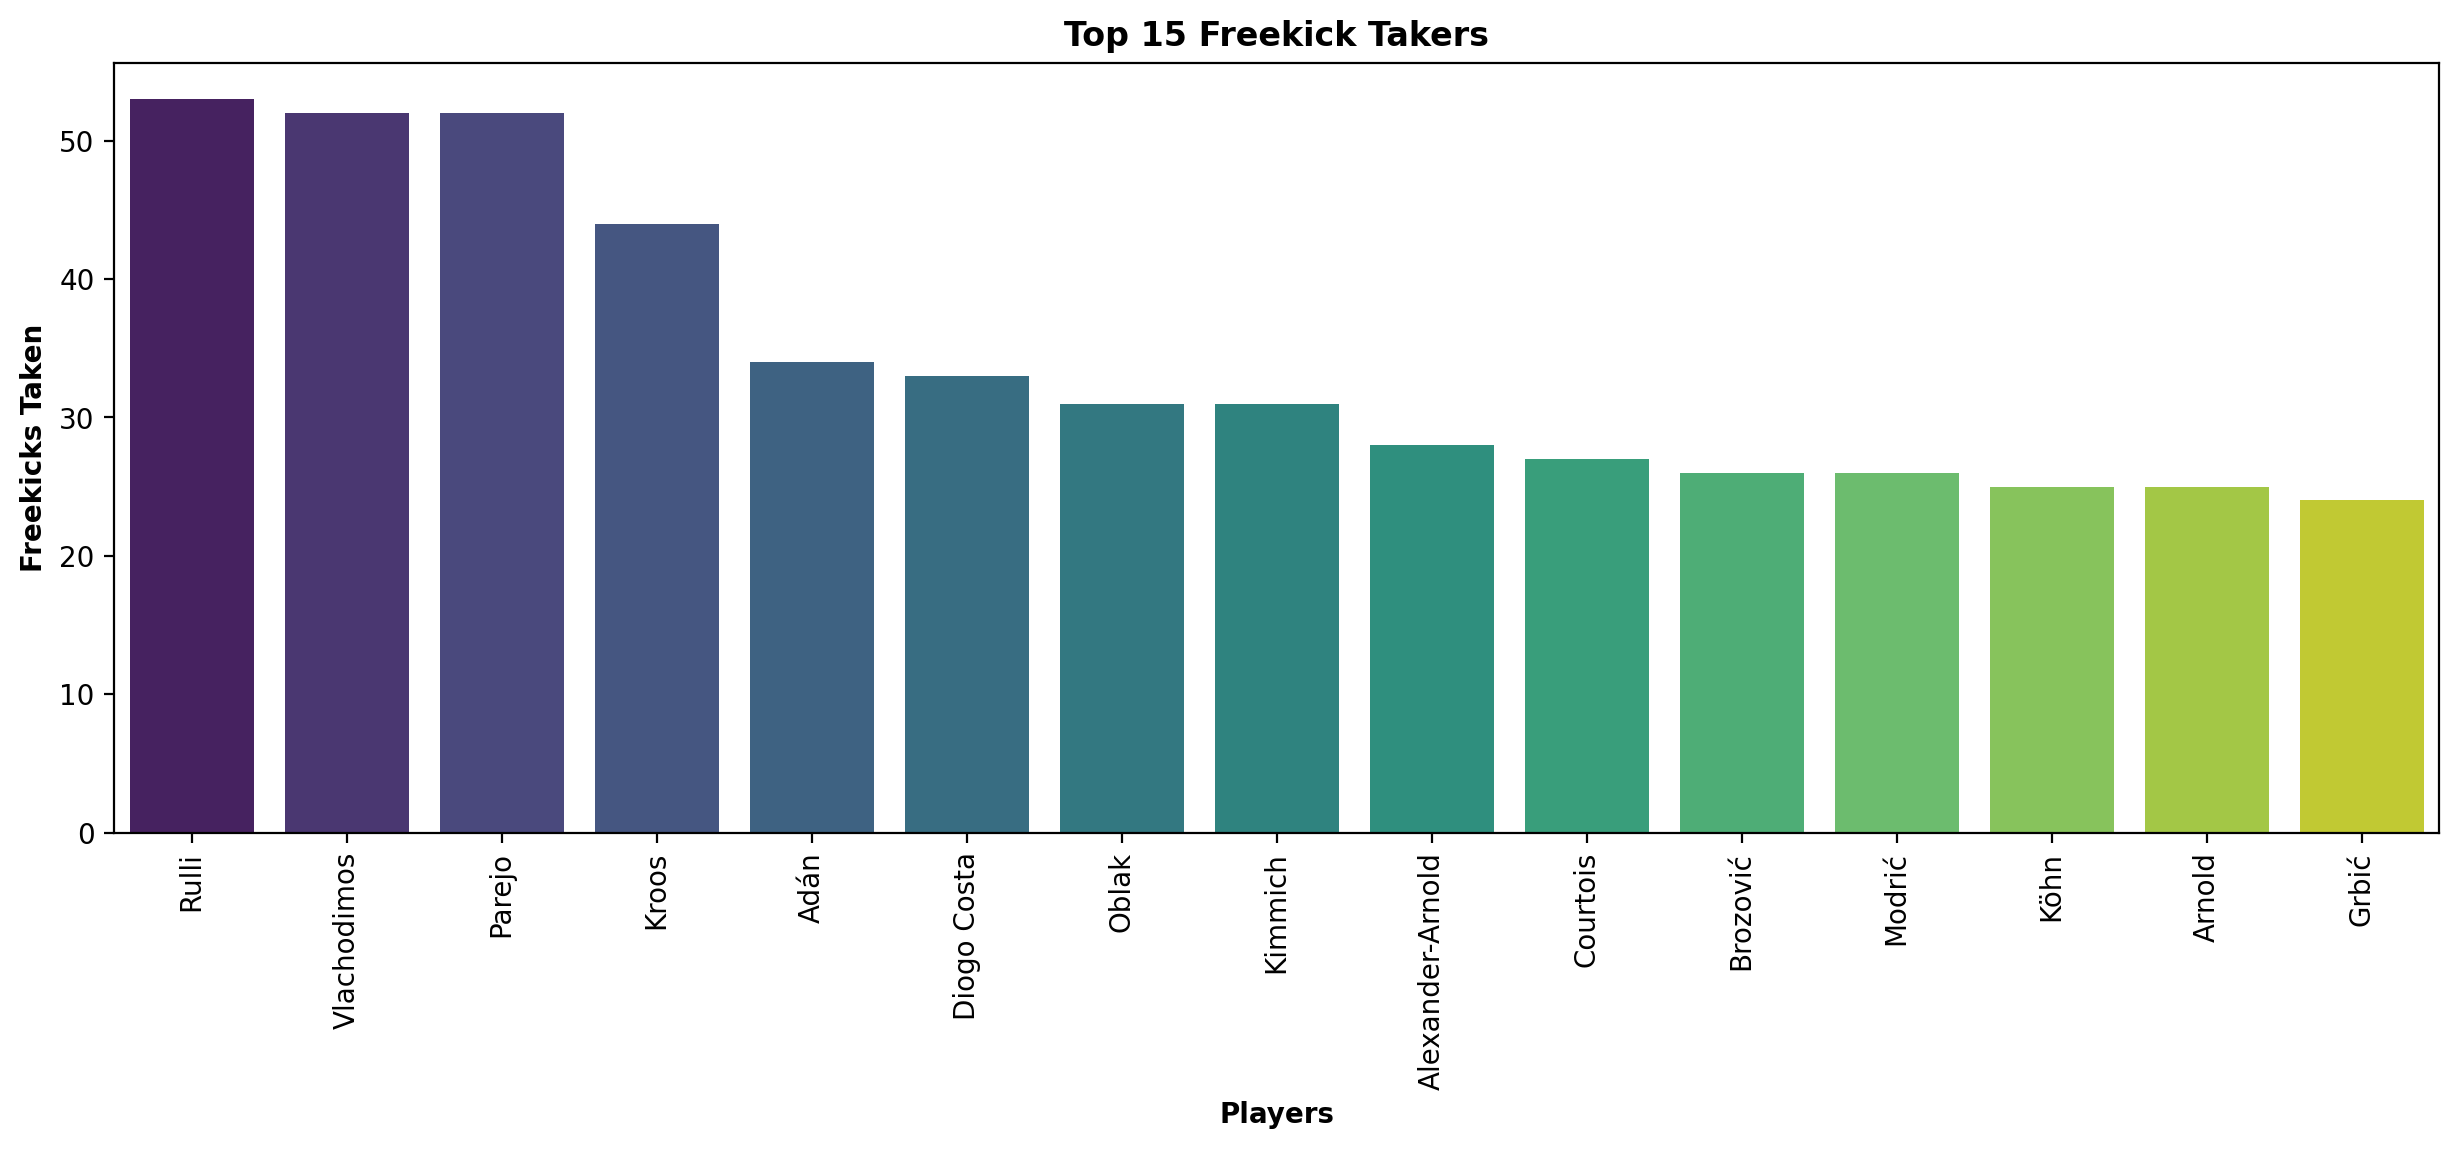

In [68]:
plt.figure(figsize = (15,5), dpi = 200)
plt.title('Top 15 Freekick Takers', fontsize = 12, weight = 'bold')
sns.barplot(data = top15_freekicks, x = 'player_name', y = 'freekicks_taken',hue = 'player_name', palette = 'viridis',legend = False)
plt.xticks(rotation = 90)
plt.xlabel('Players' , fontsize = 10, weight = 'bold')
plt.ylabel('Freekicks Taken' , fontsize = 10, weight = 'bold')
plt.show()

In [69]:
print('''Top 3:
1.Rulli
2.Vlachodimos
3.Parejo''')

Top 3:
1.Rulli
2.Vlachodimos
3.Parejo


In [70]:
passes_completed_position = dist_df.groupby('position')['pass_completed'].sum()

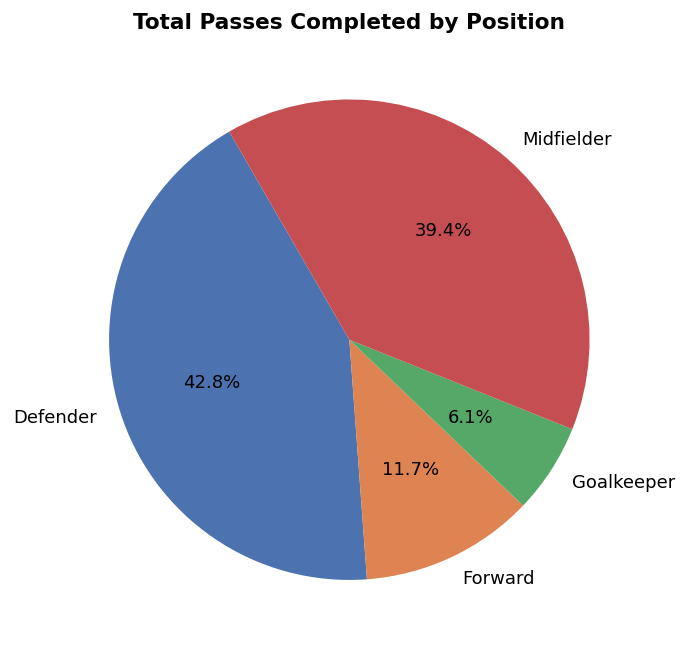

In [71]:
plt.figure(figsize = (8,6),dpi = 130)
plt.title('Total Passes Completed by Position', fontsize = 12, weight = 'bold')
plt.pie(passes_completed_position,labels = passes_completed_position.index, autopct='%1.1f%%', startangle=120, colors = sns.color_palette(palette='deep'))
plt.show()

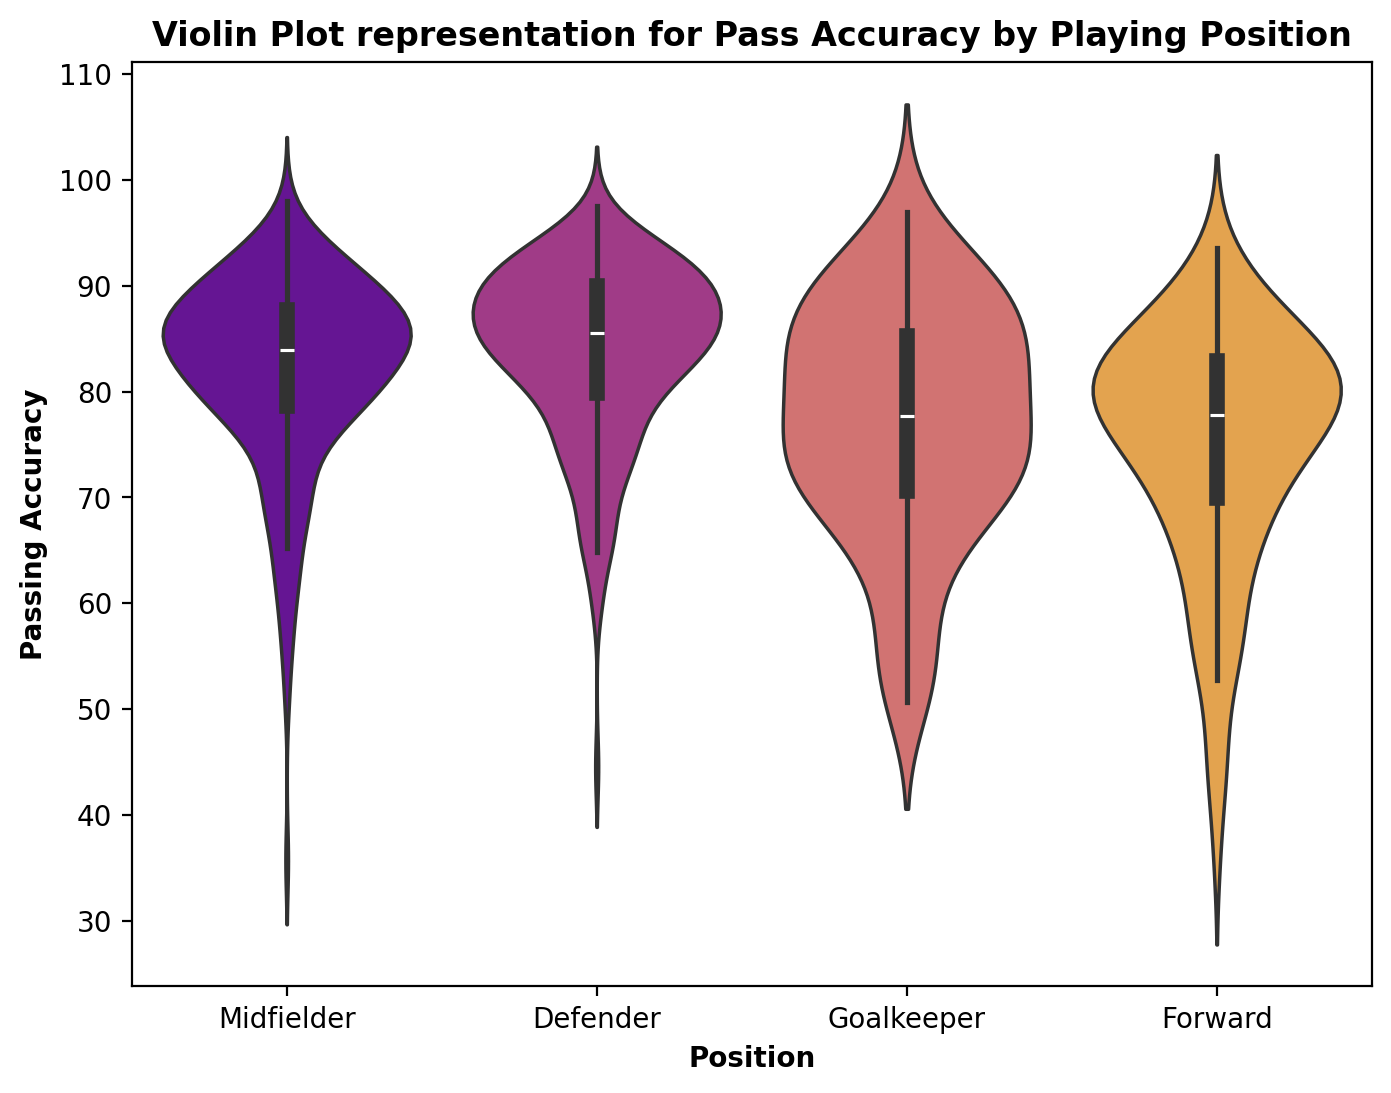

In [72]:
plt.figure(figsize = (8,6), dpi = 200)
plt.title('Violin Plot representation for Pass Accuracy by Playing Position', fontsize = 12, weight = 'bold')
sns.violinplot(y= dist_df['pass_accuracy'], x = dist_df['position'], palette = 'plasma', hue =  dist_df['position'], legend = False)
plt.xlabel('Position', fontsize = 10 , weight = 'bold')
plt.ylabel('Passing Accuracy', fontsize = 10 , weight = 'bold')
plt.show()

In [73]:
print("Conclusion: The Defenders and Midfields are more accurate in terms of passing.")

Conclusion: The Defenders and Midfields are more accurate in terms of passing.


In [74]:
cross_completed_position = dist_df.groupby('position')['cross_complted'].sum()

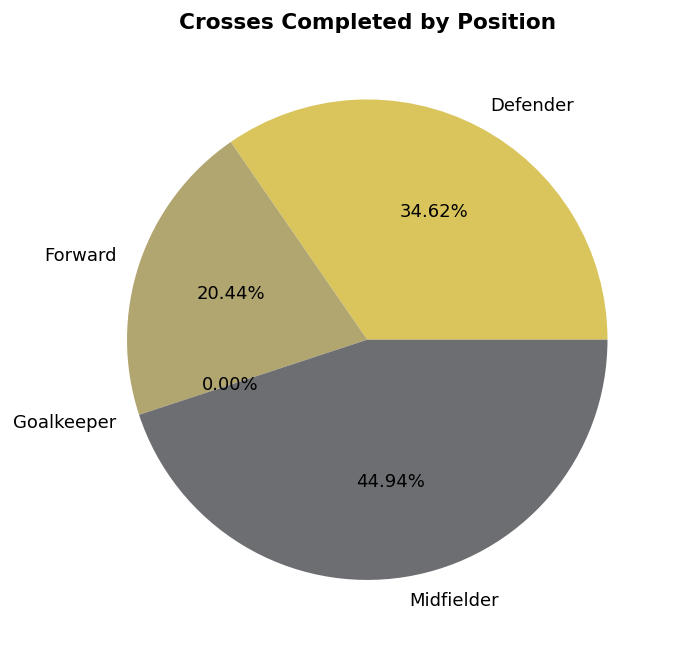

In [75]:
plt.figure(figsize = (8,6), dpi = 130)
plt.title('Crosses Completed by Position', fontsize = 12, weight = 'bold')
plt.pie(cross_completed_position, labels = cross_completed_position.index, autopct = '%1.2f%%', startangle = 0, colors = sns.color_palette('cividis_r'))
plt.show()                                                                                                                                         

In [76]:
print("Conclusion: The Midfielders and Defenders lead the charge in this category.")

Conclusion: The Midfielders and Defenders lead the charge in this category.


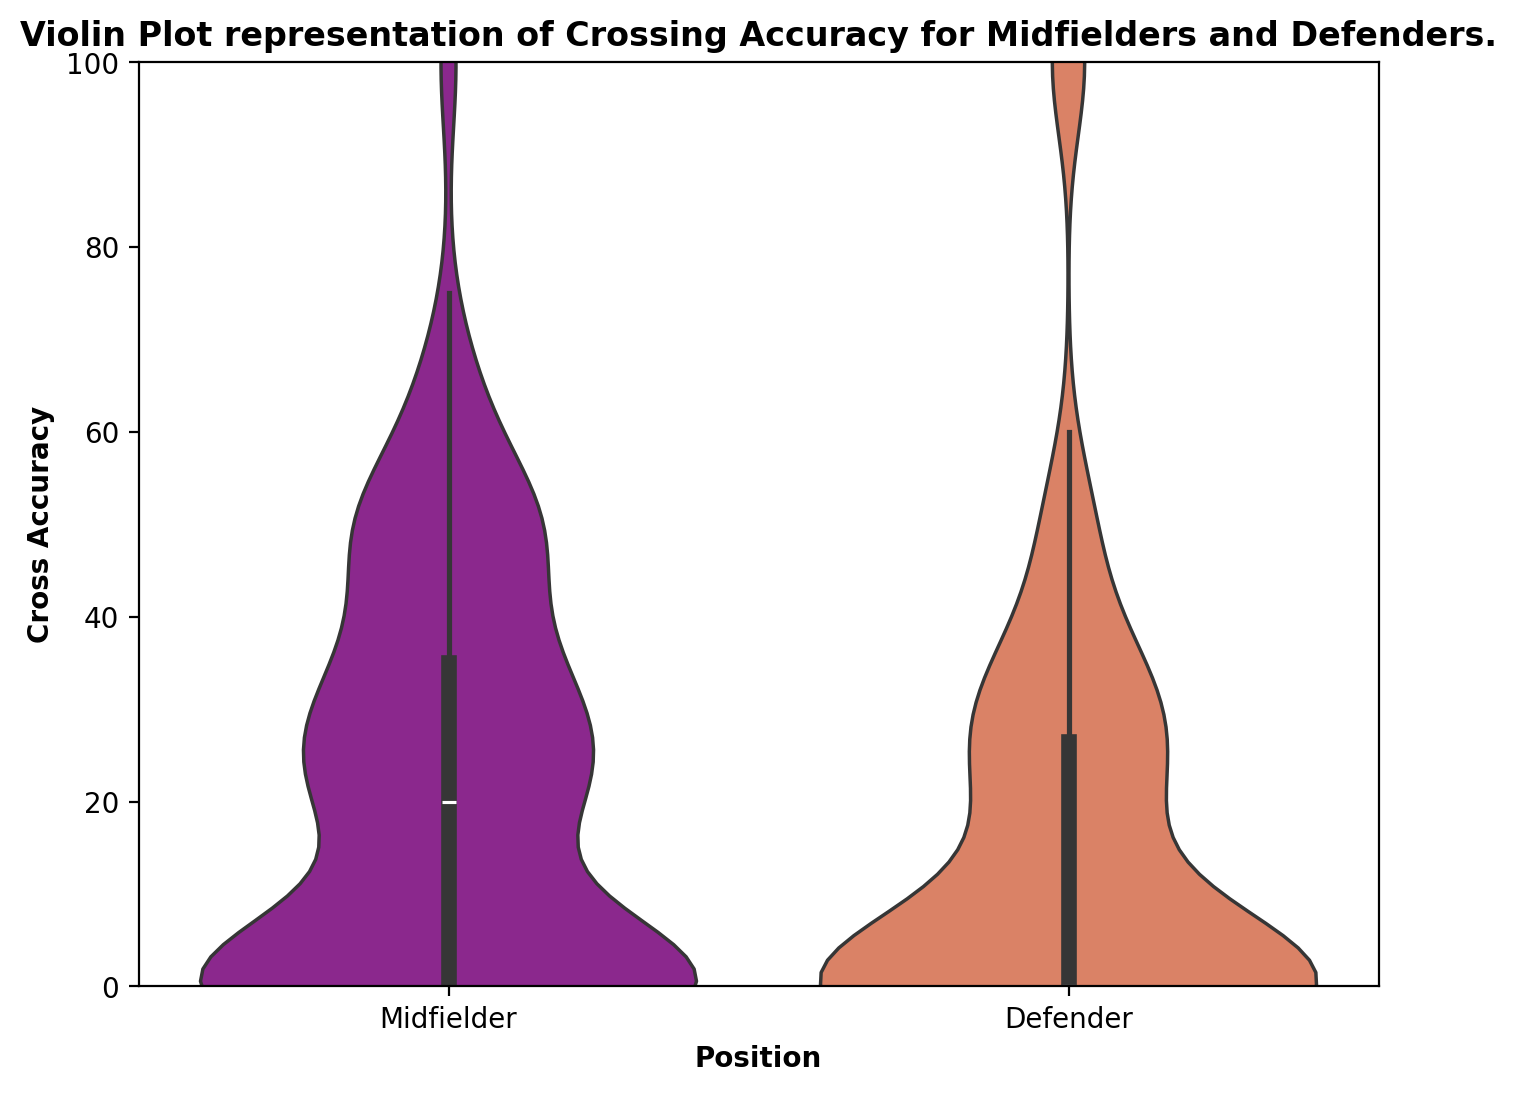

In [77]:
cross_acc_def_mid = dist_df[dist_df['position'].isin(['Midfielder', 'Defender'])]
plt.figure(figsize = (8,6), dpi = 200)
plt.title('Violin Plot representation of Crossing Accuracy for Midfielders and Defenders.',fontsize = 12, weight = 'bold')
sns.violinplot(y = cross_acc_def_mid['cross_accuracy'], x = cross_acc_def_mid['position'], palette = 'plasma' , hue = cross_acc_def_mid['position'] , legend = False)
plt.ylim(0, 100)
plt.xlabel('Position', fontsize = 10, weight= 'bold')
plt.ylabel('Cross Accuracy', fontsize = 10, weight= 'bold')
plt.show()

In [78]:
print("Conclusion: Midfielders are generally more accurate than Defenders.However, there are more defenders with cross accuracy close to a 100.")

Conclusion: Midfielders are generally more accurate than Defenders.However, there are more defenders with cross accuracy close to a 100.


In [79]:
defend_df = pd.read_csv('defending.csv')

In [80]:
defend_df.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


In [81]:
club_defending_summary = defend_df.groupby('club').agg({
'balls_recoverd' : 'sum',
'tackles' : 'sum',
'clearance_attempted' : 'sum'
})

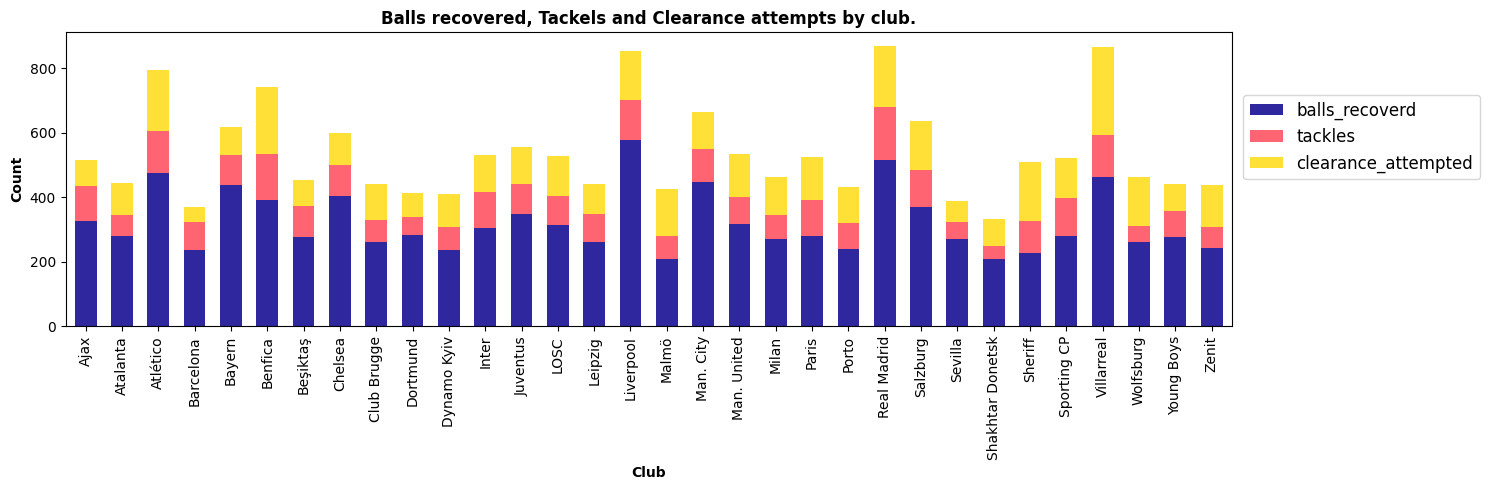

In [82]:
club_defending_summary.plot(
    kind = 'bar',
    figsize = (15,5),
    width = 0.6,
    stacked = True,
    color = ['#2E279D', '#FF6473', '#FFE037']
)
plt.title('Balls recovered, Tackels and Clearance attempts by club.', fontsize = 12, weight = 'bold')
plt.xlabel('Club', fontsize = 10, weight = 'bold')
plt.ylabel('Count', fontsize = 10, weight = 'bold')
plt.legend(loc = (1.01, 0.5), fontsize = 12)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [83]:
top15_ball_recoveries = defend_df.sort_values('balls_recoverd', ascending = False).head(15)	
top15_ball_recoveries

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
5,6,Thiago Silva,Chelsea,Defender,65,9,4,5,17,9
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
8,8,Van Dijk,Liverpool,Defender,62,3,2,1,29,9
7,8,Capoue,Villarreal,Midfielder,62,11,1,10,29,12
9,10,João Cancelo,Man. City,Defender,56,9,6,3,13,9


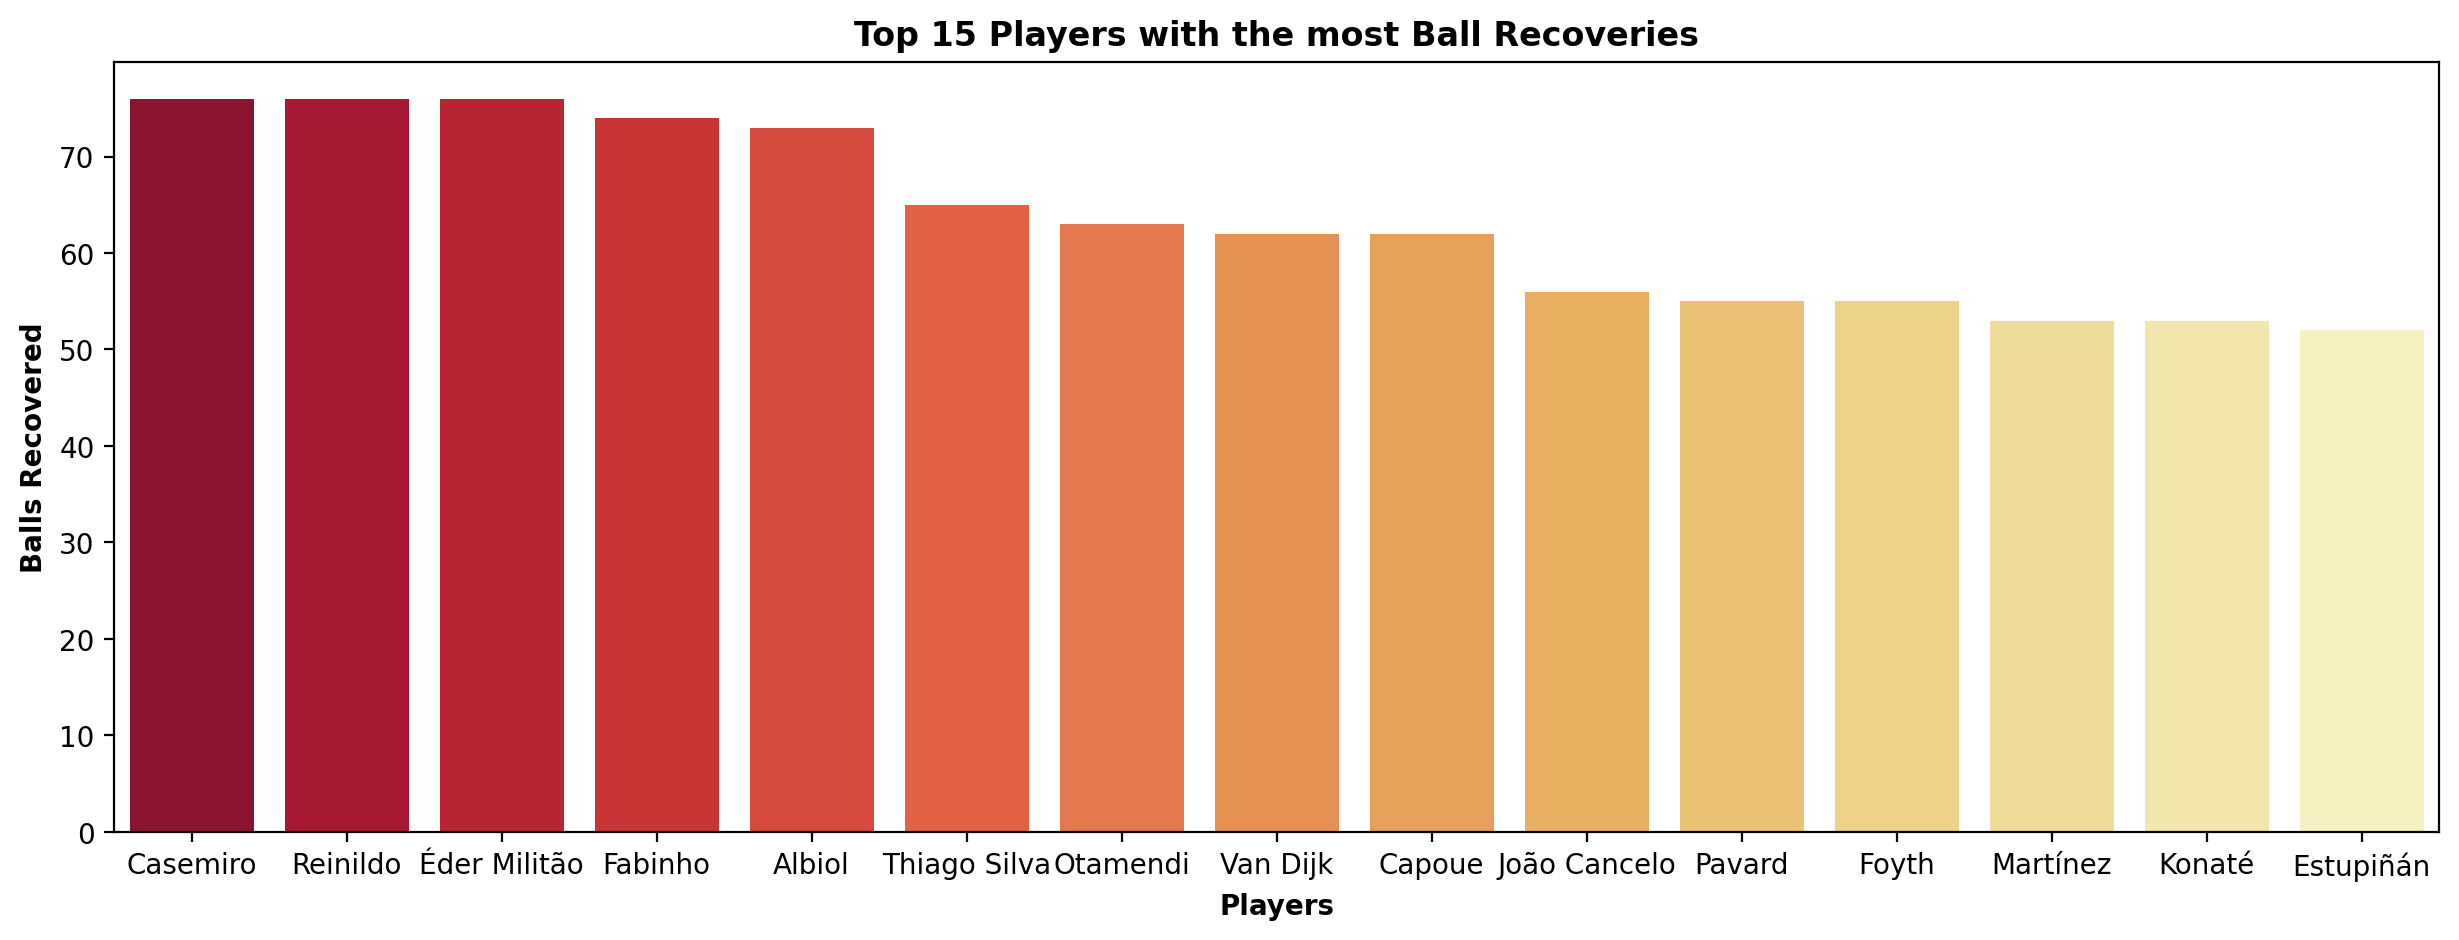

In [84]:
plt.figure(figsize = (15,5), dpi = 200)
plt.title('Top 15 Players with the most Ball Recoveries',fontsize = 12, weight = 'bold')
sns.barplot(data = top15_ball_recoveries, x = 'player_name', y = 'balls_recoverd', hue = 'player_name', legend = False, palette = 'YlOrRd_r')
plt.xlabel('Players', fontsize = 10, weight = 'bold')
plt.ylabel('Balls Recovered', fontsize = 10, weight = 'bold')
plt.show()

In [85]:
print('''Top 3:
1. Casemiro, Reinildo and Eder Militao
2. Fabinho
3. Albiol''')

Top 3:
1. Casemiro, Reinildo and Eder Militao
2. Fabinho
3. Albiol


In [86]:
ball_recoveries_position = defend_df.groupby('position')['balls_recoverd'].sum()

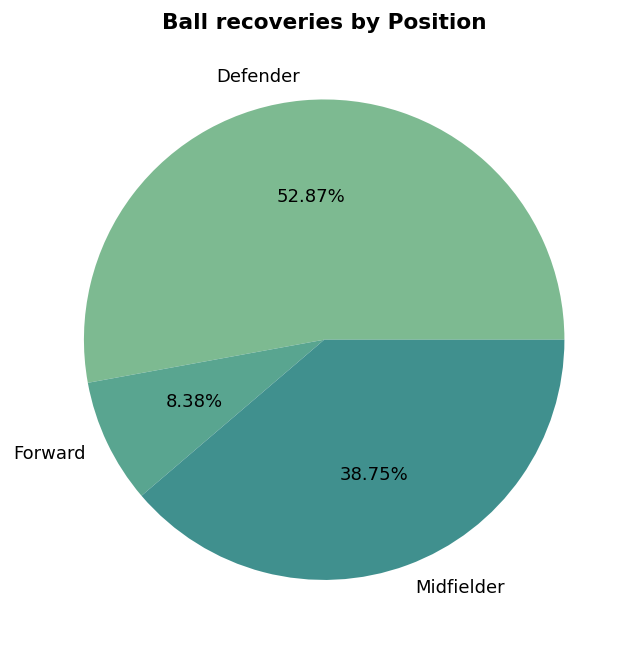

In [87]:
plt.figure(figsize = (8,6), dpi = 130)
plt.title('Ball recoveries by Position', fontsize = 12, weight = 'bold')
plt.pie(ball_recoveries_position, labels = ball_recoveries_position.index, autopct = '%1.2f%%' , startangle = 0, colors = sns.color_palette('crest'))
plt.show()

In [88]:
print('The defenders have the most ball recoveries.')

The defenders have the most ball recoveries.


In [89]:
top15_tackles = defend_df.sort_values('tackles', ascending = False).head(15)

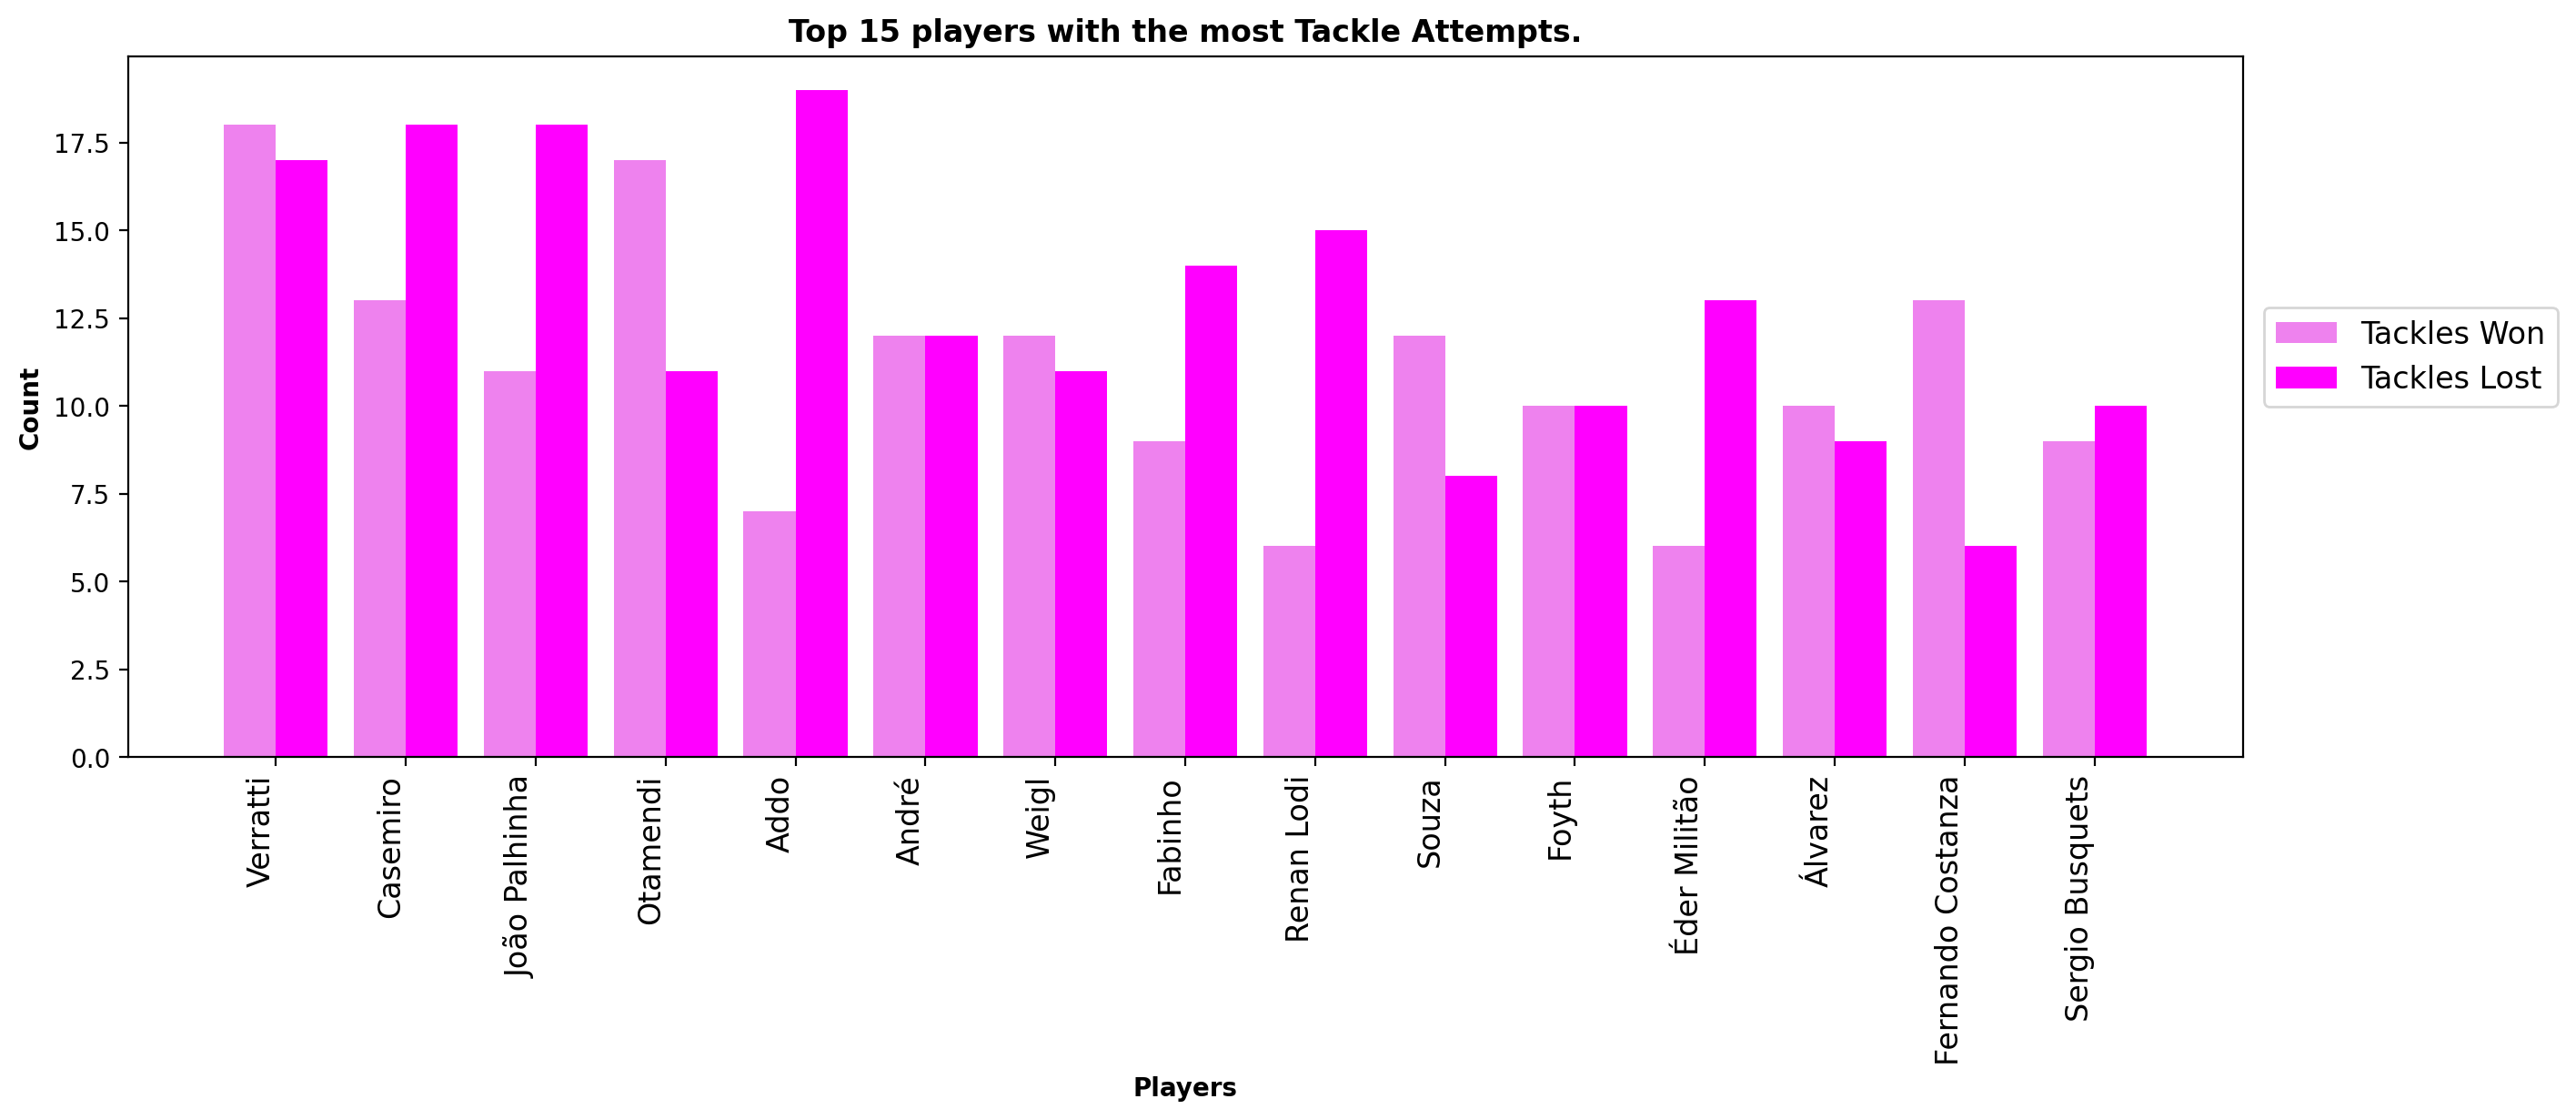

In [90]:
plt.figure(figsize = (15,5), dpi = 200)
plt.title('Top 15 players with the most Tackle Attempts.', fontsize = 12, weight = 'bold')
width = 0.4
x = np.arange(len(top15_tackles))
plt.bar(x - width / 2, top15_tackles['t_won'], width, color = 'violet', label = 'Tackles Won')
plt.bar(x + width / 2, top15_tackles['t_lost'], width, color = 'magenta', label = 'Tackles Lost')
plt.xlabel('Players', fontsize = 10, weight = 'bold')
plt.ylabel('Count', fontsize = 10, weight = 'bold')
plt.xticks(ticks = x, labels = top15_tackles['player_name'], rotation = 90, ha = 'right', fontsize = 12) 
plt.legend(fontsize = 12, loc = (1.01,0.5))
plt.show()

In [91]:
print('''Top 3:
1. Veratti
2. Otamendi
3. Casemiro & Fernando Costanza''')

Top 3:
1. Veratti
2. Otamendi
3. Casemiro & Fernando Costanza


In [92]:
most_tackles_position = defend_df.groupby('position')['tackles'].sum()

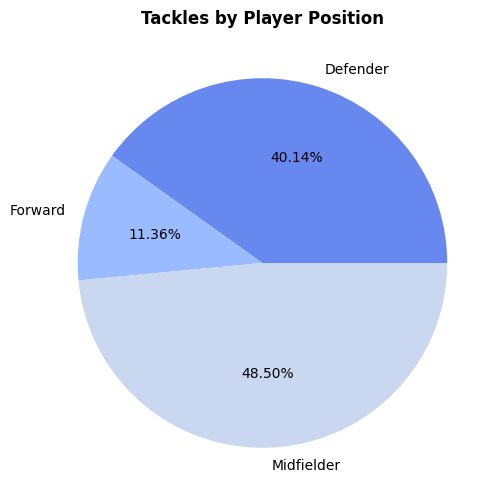

In [93]:
fig = plt.figure(figsize = (8,6))
plt.title('Tackles by Player Position', fontsize = 12, weight = 'bold')
plt.pie(
    most_tackles_position,
    labels = most_tackles_position.index,
    autopct = '%1.2f%%',
    startangle = 0,
    colors = sns.color_palette('coolwarm'),
)
plt.show()

In [94]:
top15_clearance = defend_df.sort_values('clearance_attempted', ascending = False).head(15)
top15_clearance

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
24,22,Pau Torres,Villarreal,Defender,49,7,3,4,62,12
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
16,17,Vertonghen,Benfica,Defender,51,9,6,3,51,10
6,7,Otamendi,Benfica,Defender,63,28,17,11,48,9
53,54,Fernando Costanza,Sheriff,Defender,39,19,13,6,39,6
97,95,Dulanto,Sheriff,Defender,32,11,3,8,39,6
119,110,Arboleda,Sheriff,Defender,30,1,0,1,37,6
39,38,Marquinhos,Paris,Defender,42,2,2,0,36,8
54,54,Wöber,Salzburg,Defender,39,14,6,8,36,7
145,146,Kimpembe,Paris,Defender,26,9,4,5,32,7


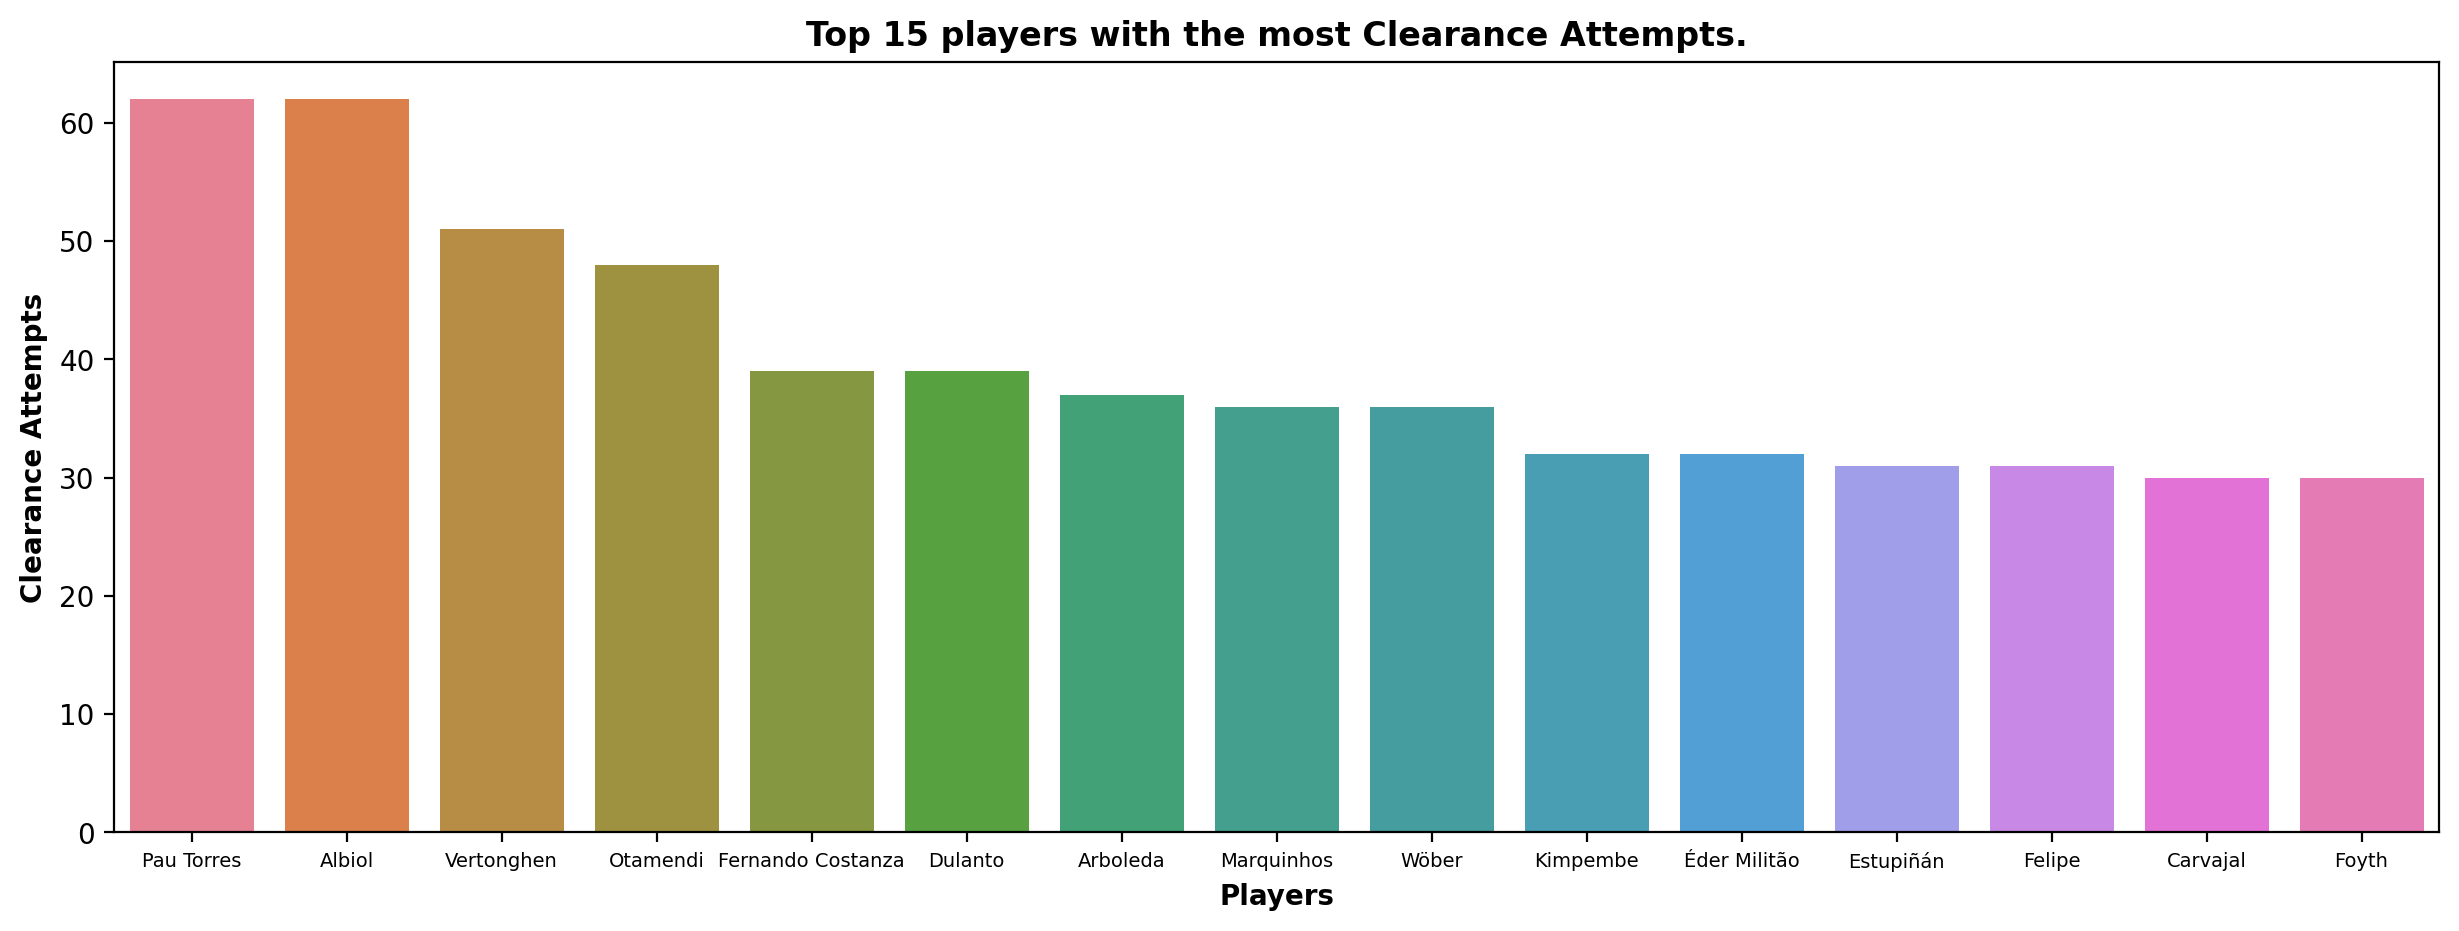

In [95]:
plt.figure(figsize = (15,5), dpi = 200)
plt.title('Top 15 players with the most Clearance Attempts.', fontsize = 12, weight = 'bold')
sns.barplot(
    data = top15_clearance,
    x = top15_clearance['player_name'],
    y = top15_clearance['clearance_attempted'],
    hue = top15_clearance['player_name'],
    legend = False,
)
plt.xlabel('Players', fontsize = 10, weight = 'bold')
plt.ylabel('Clearance Attempts', fontsize = 10, weight = 'bold')
plt.xticks(fontsize = 7)
plt.show()

In [96]:
print('''Top 3:
1. Pau Torres & Albiol
2. Vertonghen
3. Otamendi''')

Top 3:
1. Pau Torres & Albiol
2. Vertonghen
3. Otamendi


In [97]:
clearance_attempts_position = defend_df.groupby('position')['clearance_attempted'].sum()

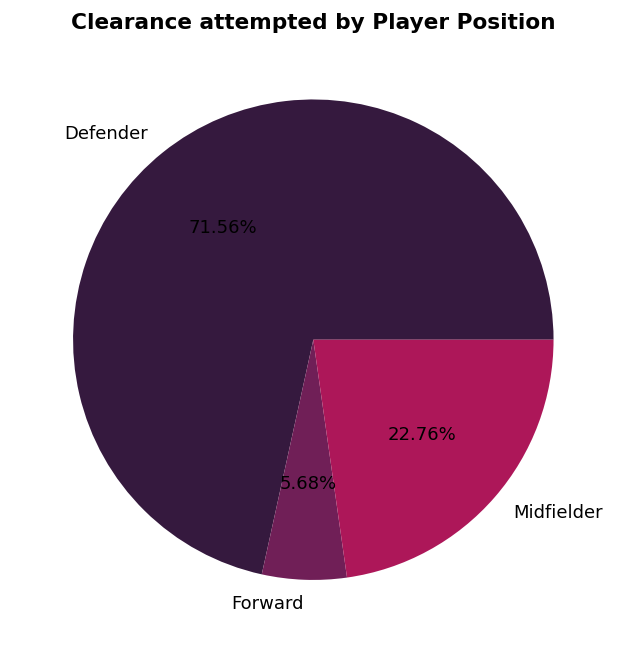

In [98]:
plt.figure(figsize = (8,6), dpi = 130)
plt.title('Clearance attempted by Player Position', fontsize = 12, weight = 'bold')
plt.pie(clearance_attempts_position, labels = clearance_attempts_position.index, autopct = '%1.2f%%', startangle = 0, colors = sns.color_palette ('rocket'))
plt.show()

In [99]:
print("The defenders have by far the most attempted Clearances.")

The defenders have by far the most attempted Clearances.


In [100]:
gk_df = pd.read_csv('goalkeeping.csv')

In [101]:
gk_df.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


In [102]:
club_goalkeeping_summary = gk_df.groupby('club').agg({
    'cleansheets' : 'sum',
    'conceded' : 'sum',
    'saved' : 'sum'
})

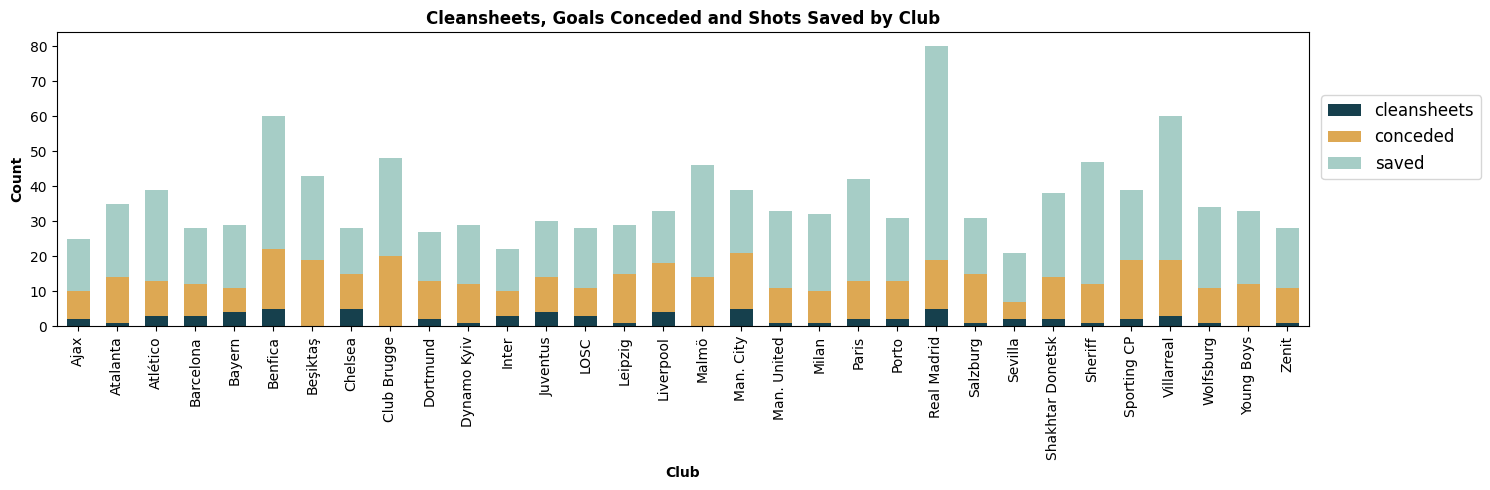

In [103]:
club_goalkeeping_summary.plot(
    kind = 'bar',
    width = 0.6,
    figsize = (15,5),
    stacked = True,
    color = ['#16404D', '#DDA853', '#A6CDC6']
)
plt.title('Cleansheets, Goals Conceded and Shots Saved by Club',fontsize = 12, weight = 'bold')
plt.xlabel('Club', fontsize = 10, weight = 'bold')
plt.ylabel('Count', fontsize = 10, weight = 'bold')
plt.legend(loc = (1.01, 0.5), fontsize = 12)
plt.tight_layout()
plt.show()


In [104]:
print("Real Madrid leads the charge in these three categories.")

Real Madrid leads the charge in these three categories.


In [105]:
top15_gk = gk_df.sort_values('saved', ascending = False).head(15)

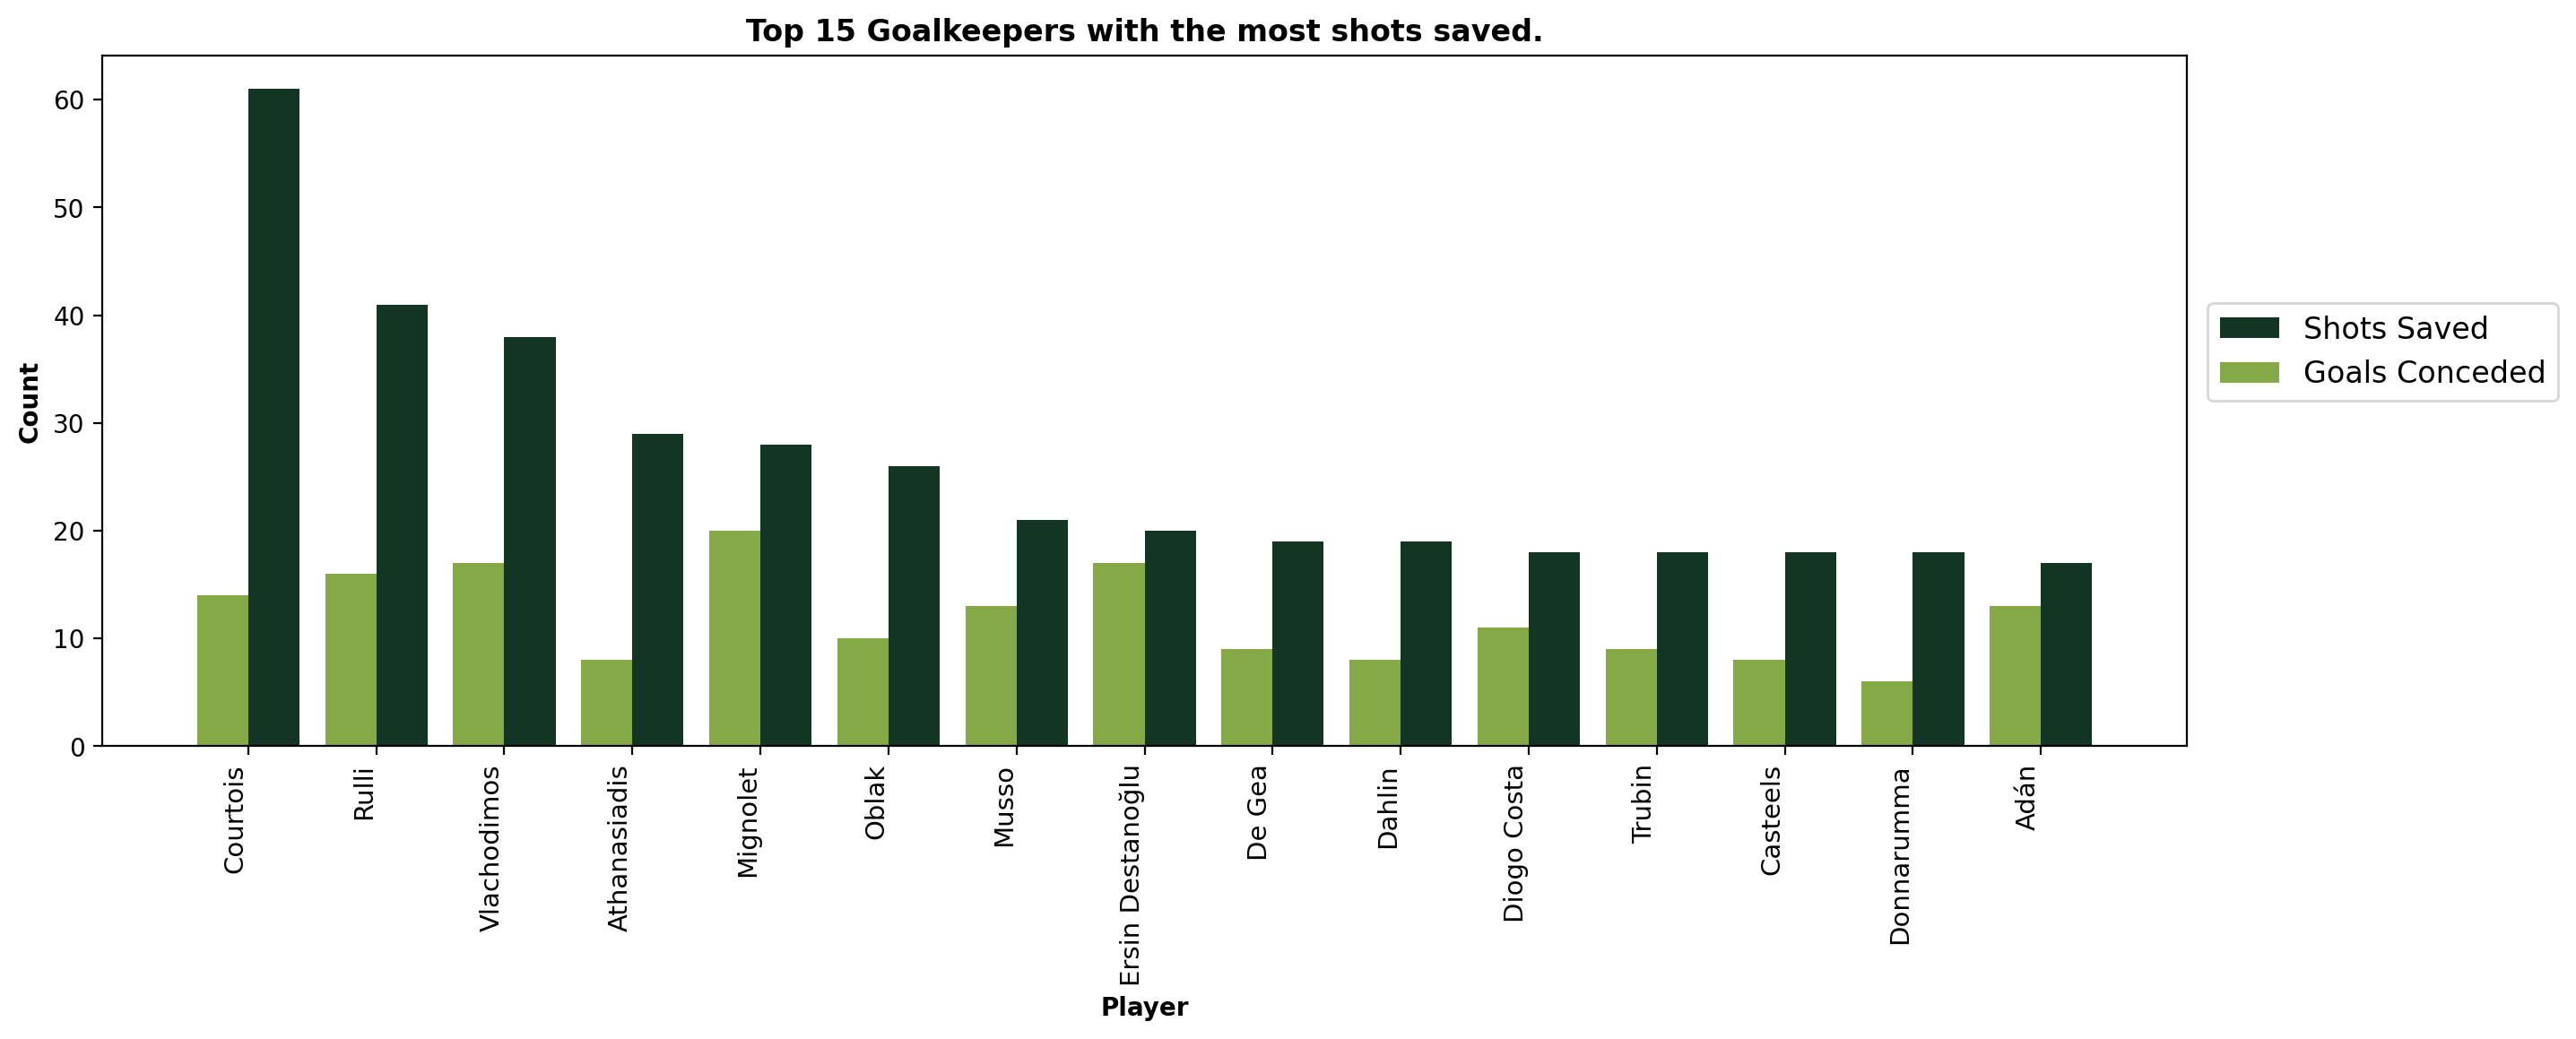

In [106]:
plt.figure(figsize = (15,5), dpi = 200)
plt.title('Top 15 Goalkeepers with the most shots saved.', fontsize = 12, weight = 'bold')
width = 0.4
x = np.arange(len(top15_gk))
plt.bar(x + width / 2, top15_gk['saved'], width, color = '#123524', label = 'Shots Saved')
plt.bar(x - width / 2, top15_gk['conceded'], width, color = '#85A947', label = 'Goals Conceded')
plt.xlabel('Player', fontsize = 10, weight = 'bold')
plt.ylabel('Count', fontsize = 10, weight = 'bold')
plt.xticks(ticks = x, labels = top15_gk['player_name'], rotation = 90, ha = 'right', fontsize = 10.5)
plt.legend(loc = (1.01,0.5),fontsize = 12)
plt.show()

In [107]:
print('''Top 3:
1. Courtois
2. Rulli
3. Vlachodimos''')

Top 3:
1. Courtois
2. Rulli
3. Vlachodimos


In [108]:
print("Real Madrid's Thibaut Courtois put on Goalkeeping Clinic.")

Real Madrid's Thibaut Courtois put on Goalkeeping Clinic.


In [109]:
saved_conceded = gk_df.agg({
    'saved' : 'sum',
    'conceded' : 'sum'
})

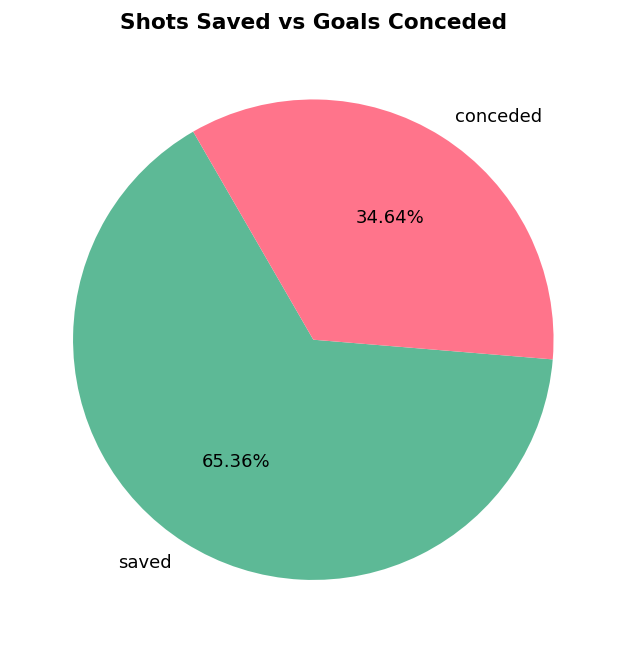

In [110]:
plt.figure(figsize = (8,6), dpi = 130)
plt.title('Shots Saved vs Goals Conceded', fontsize = 12, weight = 'bold')
plt.pie(saved_conceded, labels = saved_conceded.index, autopct = '%1.2f%%', colors = ['#5DB996', '#FF748B'], startangle = 120)
plt.show()

In [111]:
print("Almost 2 / 3rds of the shot on target were saved by the goalkeepers, while the remaining 1 / 3rd resulted in a goal.")

Almost 2 / 3rds of the shot on target were saved by the goalkeepers, while the remaining 1 / 3rd resulted in a goal.


In [112]:
penalties_saved = gk_df['saved_penalties'].value_counts()
penalties_saved_reset = penalties_saved.reset_index()

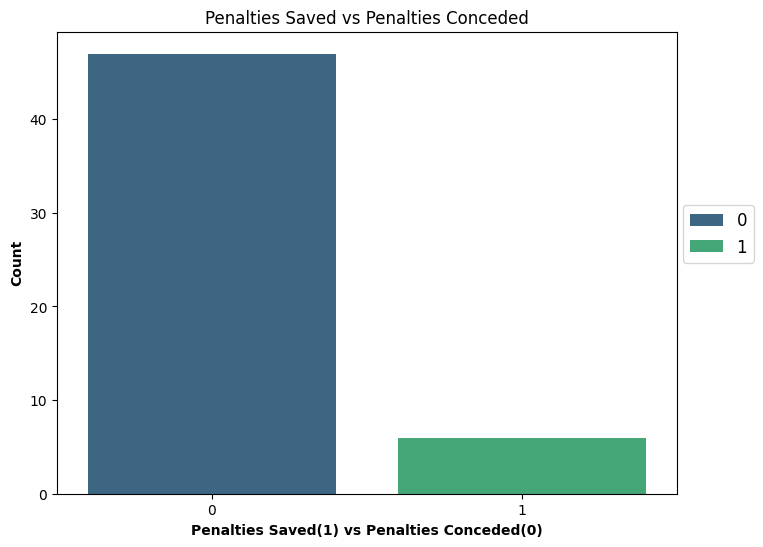

In [113]:
plt.figure(figsize = (8,6))
plt.title('Penalties Saved vs Penalties Conceded')
sns.barplot(data = penalties_saved_reset, x = 'saved_penalties', y = 'count', hue = 'saved_penalties' , palette = 'viridis')
plt.xlabel('Penalties Saved(1) vs Penalties Conceded(0)', fontsize = 10, weight = 'bold')
plt.ylabel('Count', fontsize = 10, weight = 'bold')
plt.legend( fontsize = 12, loc = (1.01,0.5))
plt.show()

In [114]:
print("47 penalties were conceded while only 6 were saved.")

47 penalties were conceded while only 6 were saved.


In [115]:
top15_cleansheets = gk_df.sort_values('cleansheets', ascending = False).head(15)

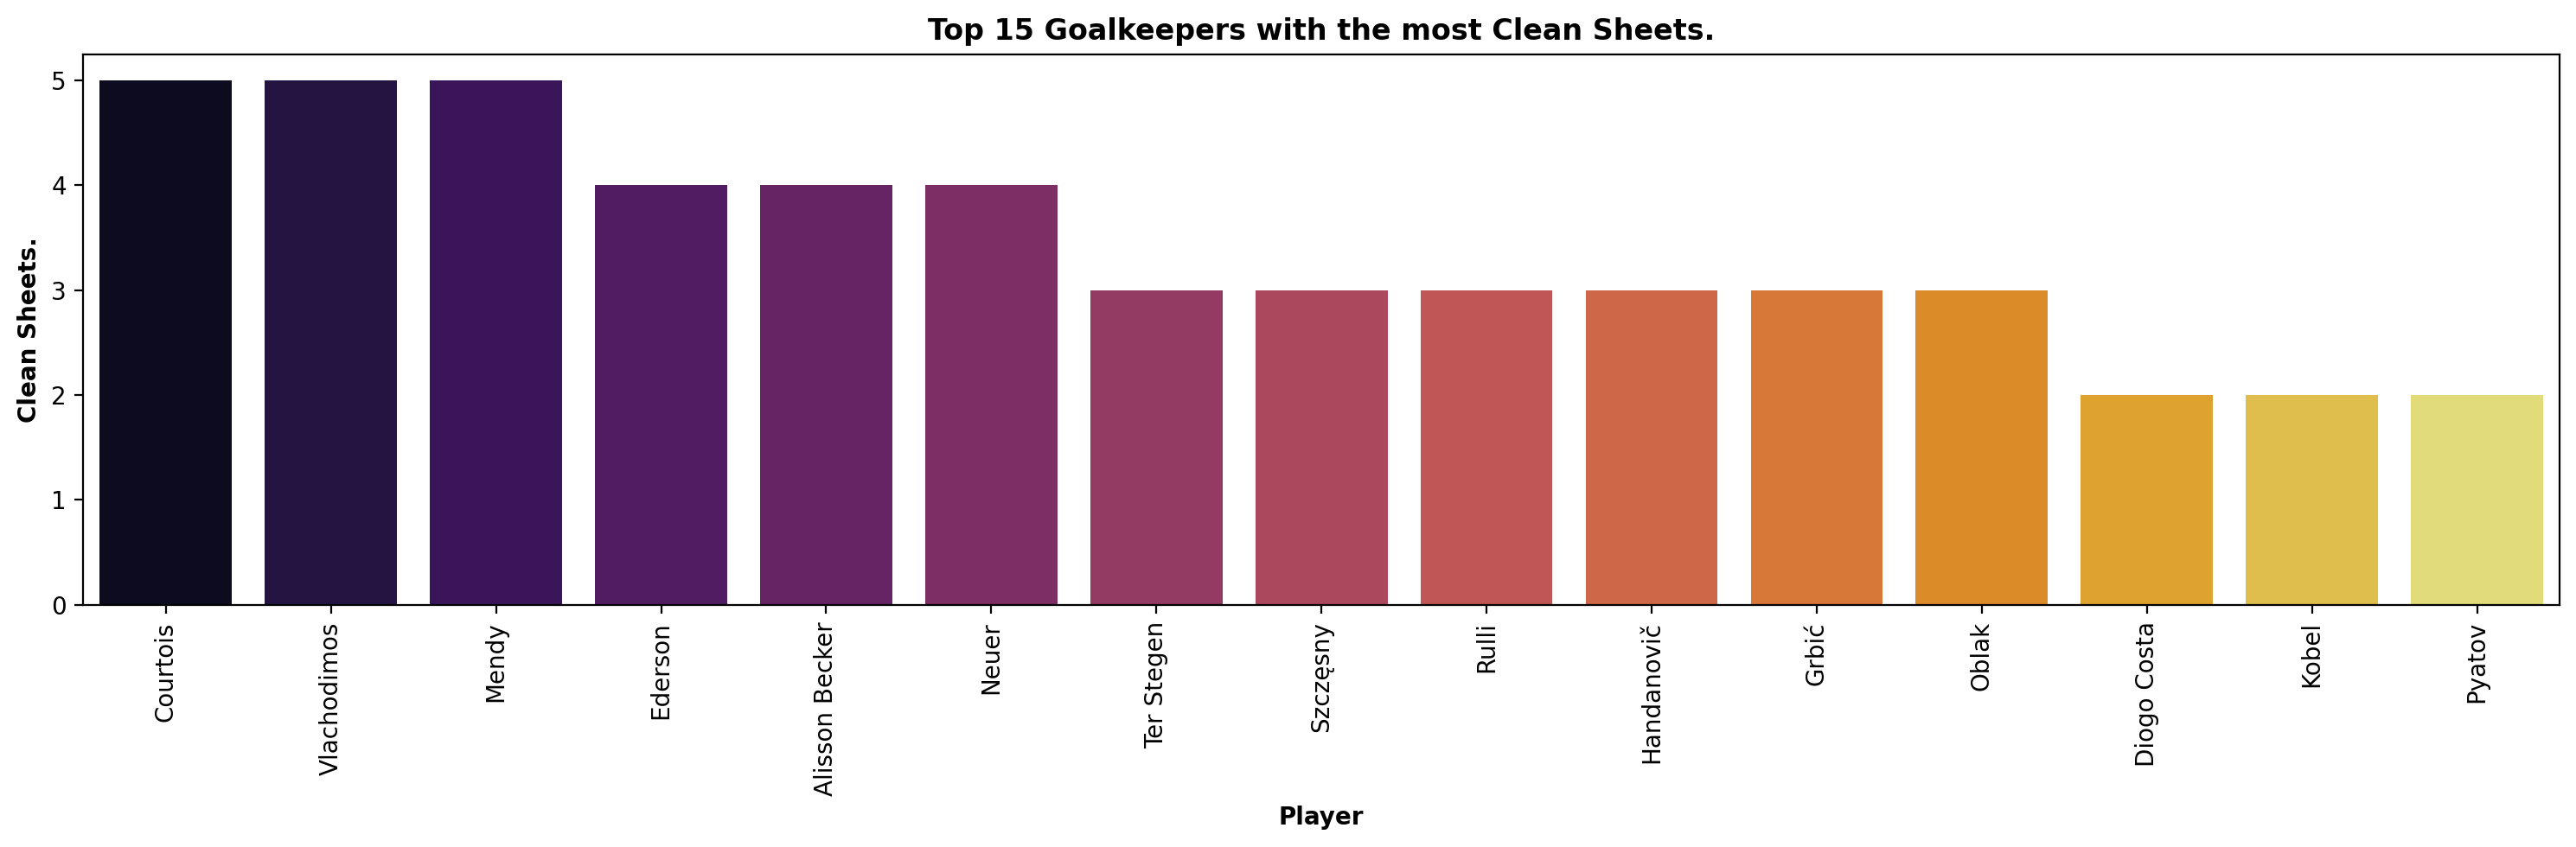

In [116]:
plt.figure(figsize = (15,5), dpi = 200)
sns.barplot(data = top15_cleansheets, x = top15_cleansheets['player_name'], y = top15_cleansheets['cleansheets'],hue = top15_cleansheets['player_name'], palette = 'inferno')
plt.title('Top 15 Goalkeepers with the most Clean Sheets.', fontsize = 12, weight = 'bold')
plt.xlabel('Player', fontsize = 10, weight = 'bold')
plt.ylabel('Clean Sheets.', fontsize = 10, weight = 'bold')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

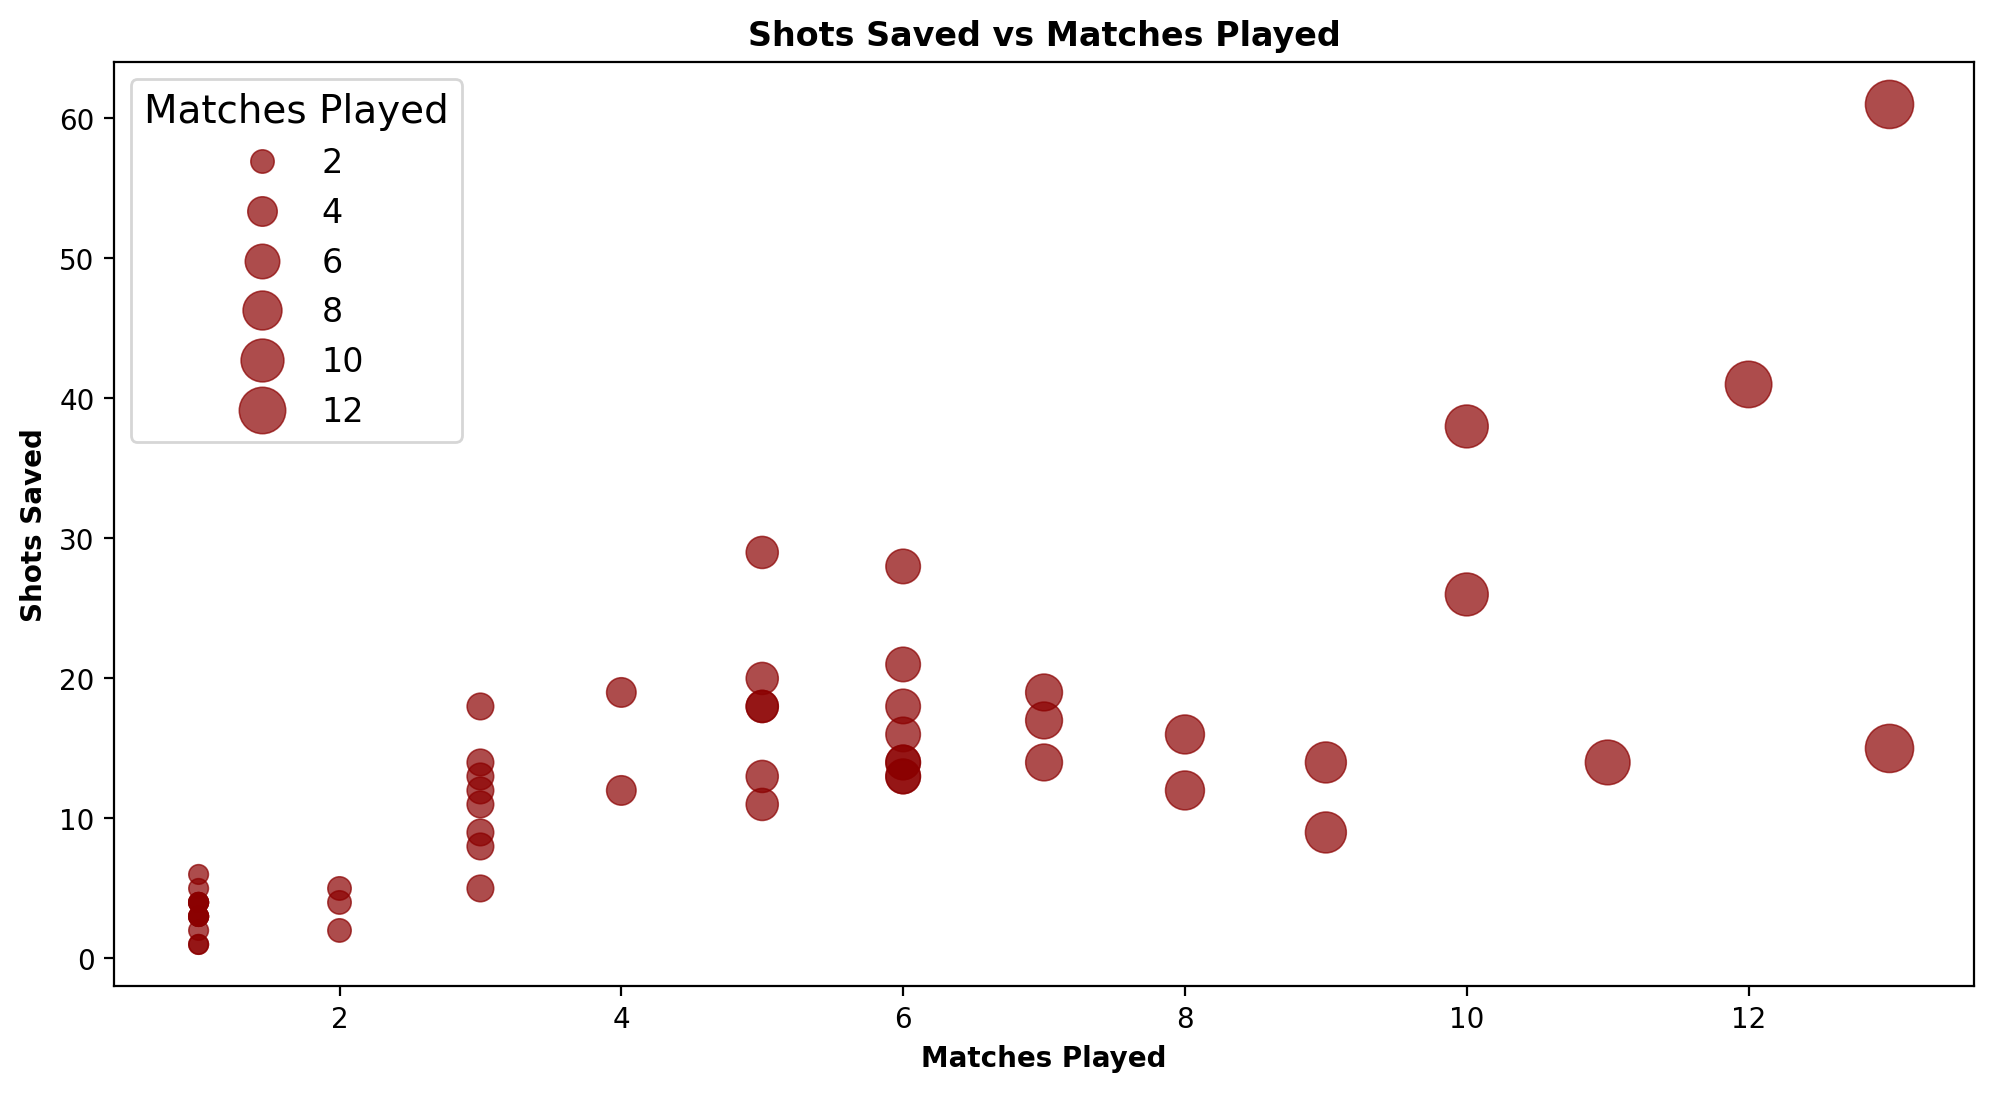

In [117]:
plt.figure(figsize = (12,6), dpi = 200)
sns.scatterplot(
    x = gk_df['match_played'],
    size = gk_df['match_played'],
    y = gk_df['saved'],
    alpha = 0.7,
    sizes = (50,300),
    color = 'darkred',
    edgecolor = None, 
    marker = 'o')
plt.xlabel('Matches Played', fontsize = 10, weight = 'bold')
plt.ylabel('Shots Saved', fontsize = 10, weight = 'bold')
plt.title('Shots Saved vs Matches Played', fontsize = 12, weight = 'bold')
plt.legend(title = 'Matches Played', loc = 'upper left', fontsize = 12, title_fontsize = 14)
plt.show()

In [118]:
print("There is a significant correlation between matches played and total saves made.")

There is a significant correlation between matches played and total saves made.


In [119]:
dp_df = pd.read_csv('disciplinary.csv')

In [141]:
dp_df.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5


In [142]:
dp_df.rename(columns={'red':'yellow', 'yellow':'red'},inplace = True)

In [143]:
fouls_committed_club = dp_df.groupby('club')['fouls_committed'].sum().reset_index()

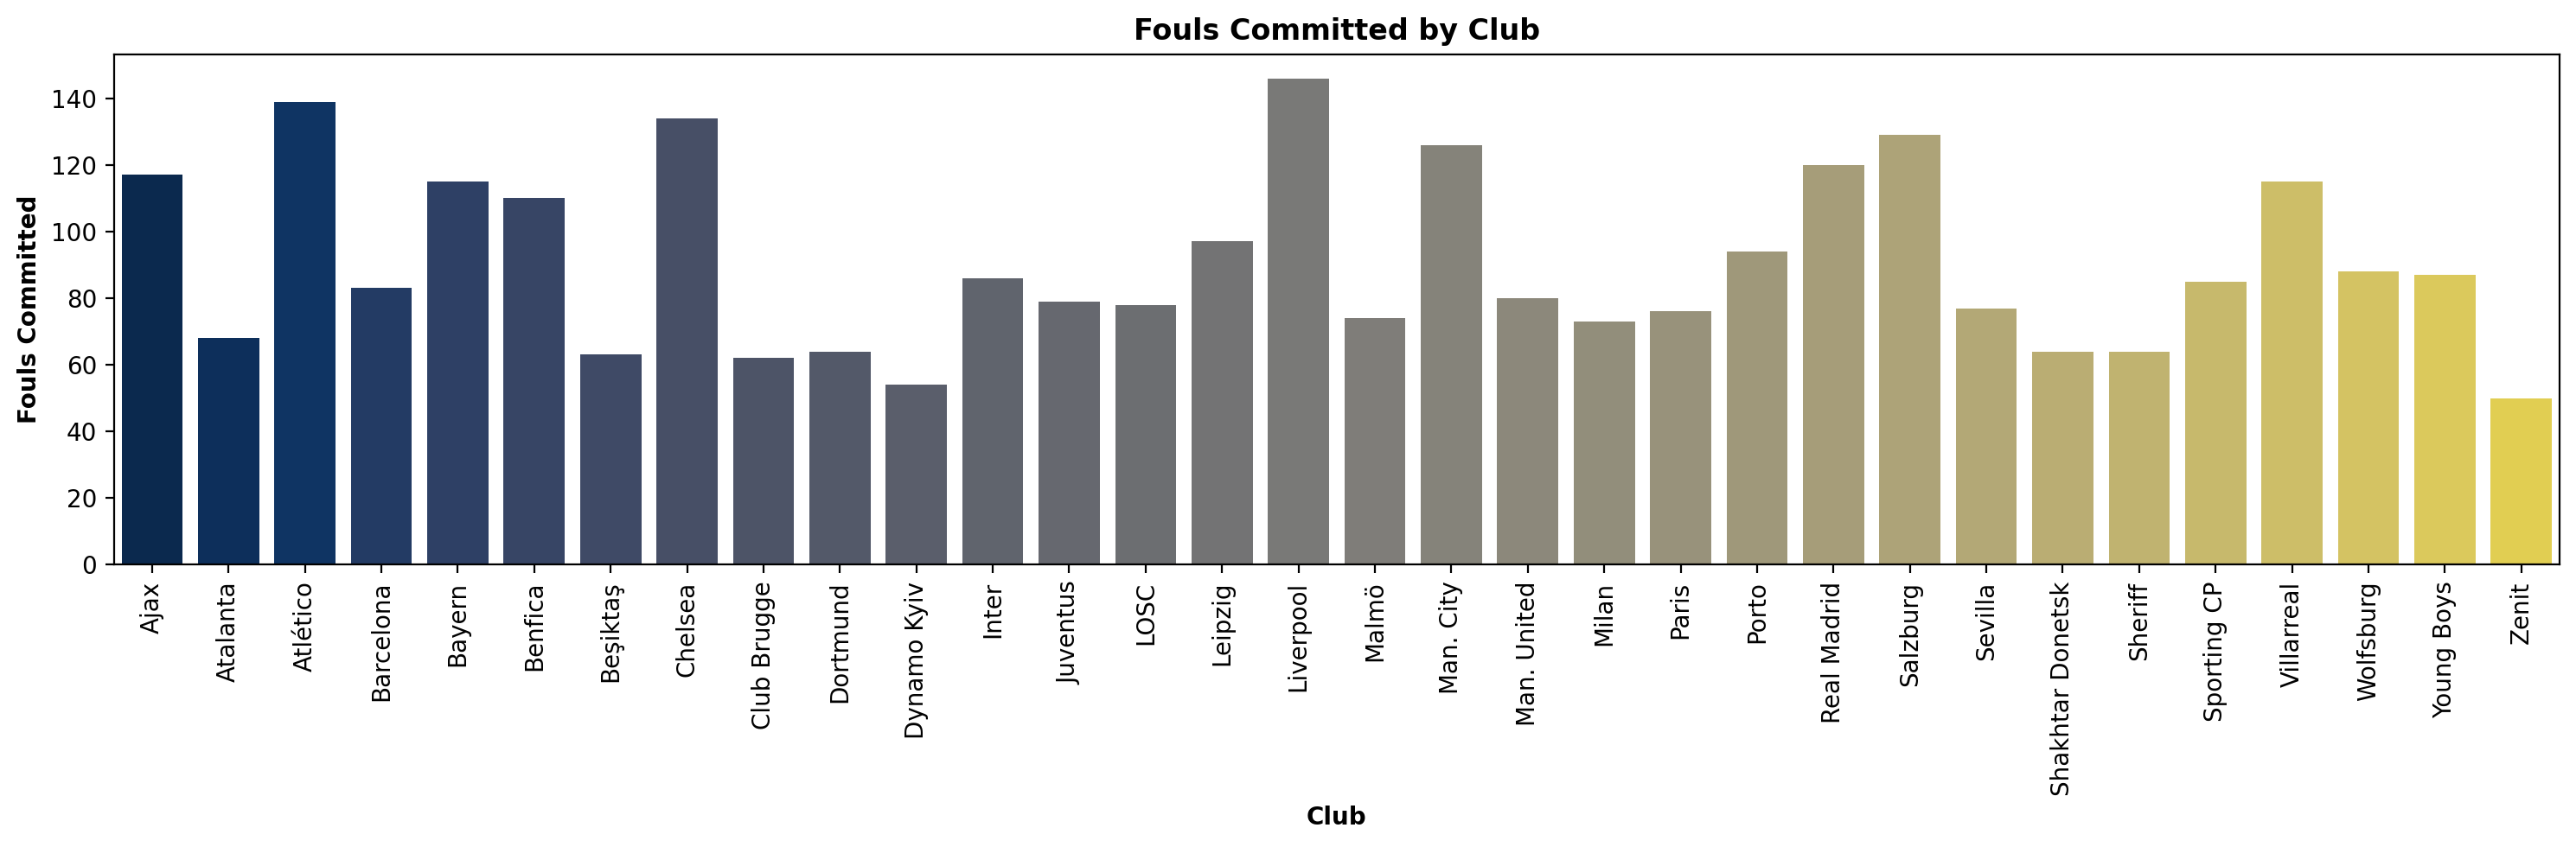

In [144]:
plt.figure(figsize = (15,5),dpi = 200)
plt.title('Fouls Committed by Club', fontsize = 12, weight = 'bold')
sns.barplot(data = fouls_committed_club, x = 'club', y = 'fouls_committed', hue = 'club', palette = 'cividis')
plt.xlabel('Club', fontsize = 10, weight = 'bold')
plt.ylabel('Fouls Committed', fontsize = 10, weight = 'bold')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [145]:
print("Liverpool, Atletico and Chelsea have committed the most fouls. Meanwhile Zenit, Dynamo Kyiv, Sheriff and Shakhtar Donetsk have committed the least fouls.")

Liverpool, Atletico and Chelsea have committed the most fouls. Meanwhile Zenit, Dynamo Kyiv, Sheriff and Shakhtar Donetsk have committed the least fouls.


In [146]:
top15_most_fouls = dp_df.sort_values('fouls_committed', ascending = False).head(15)

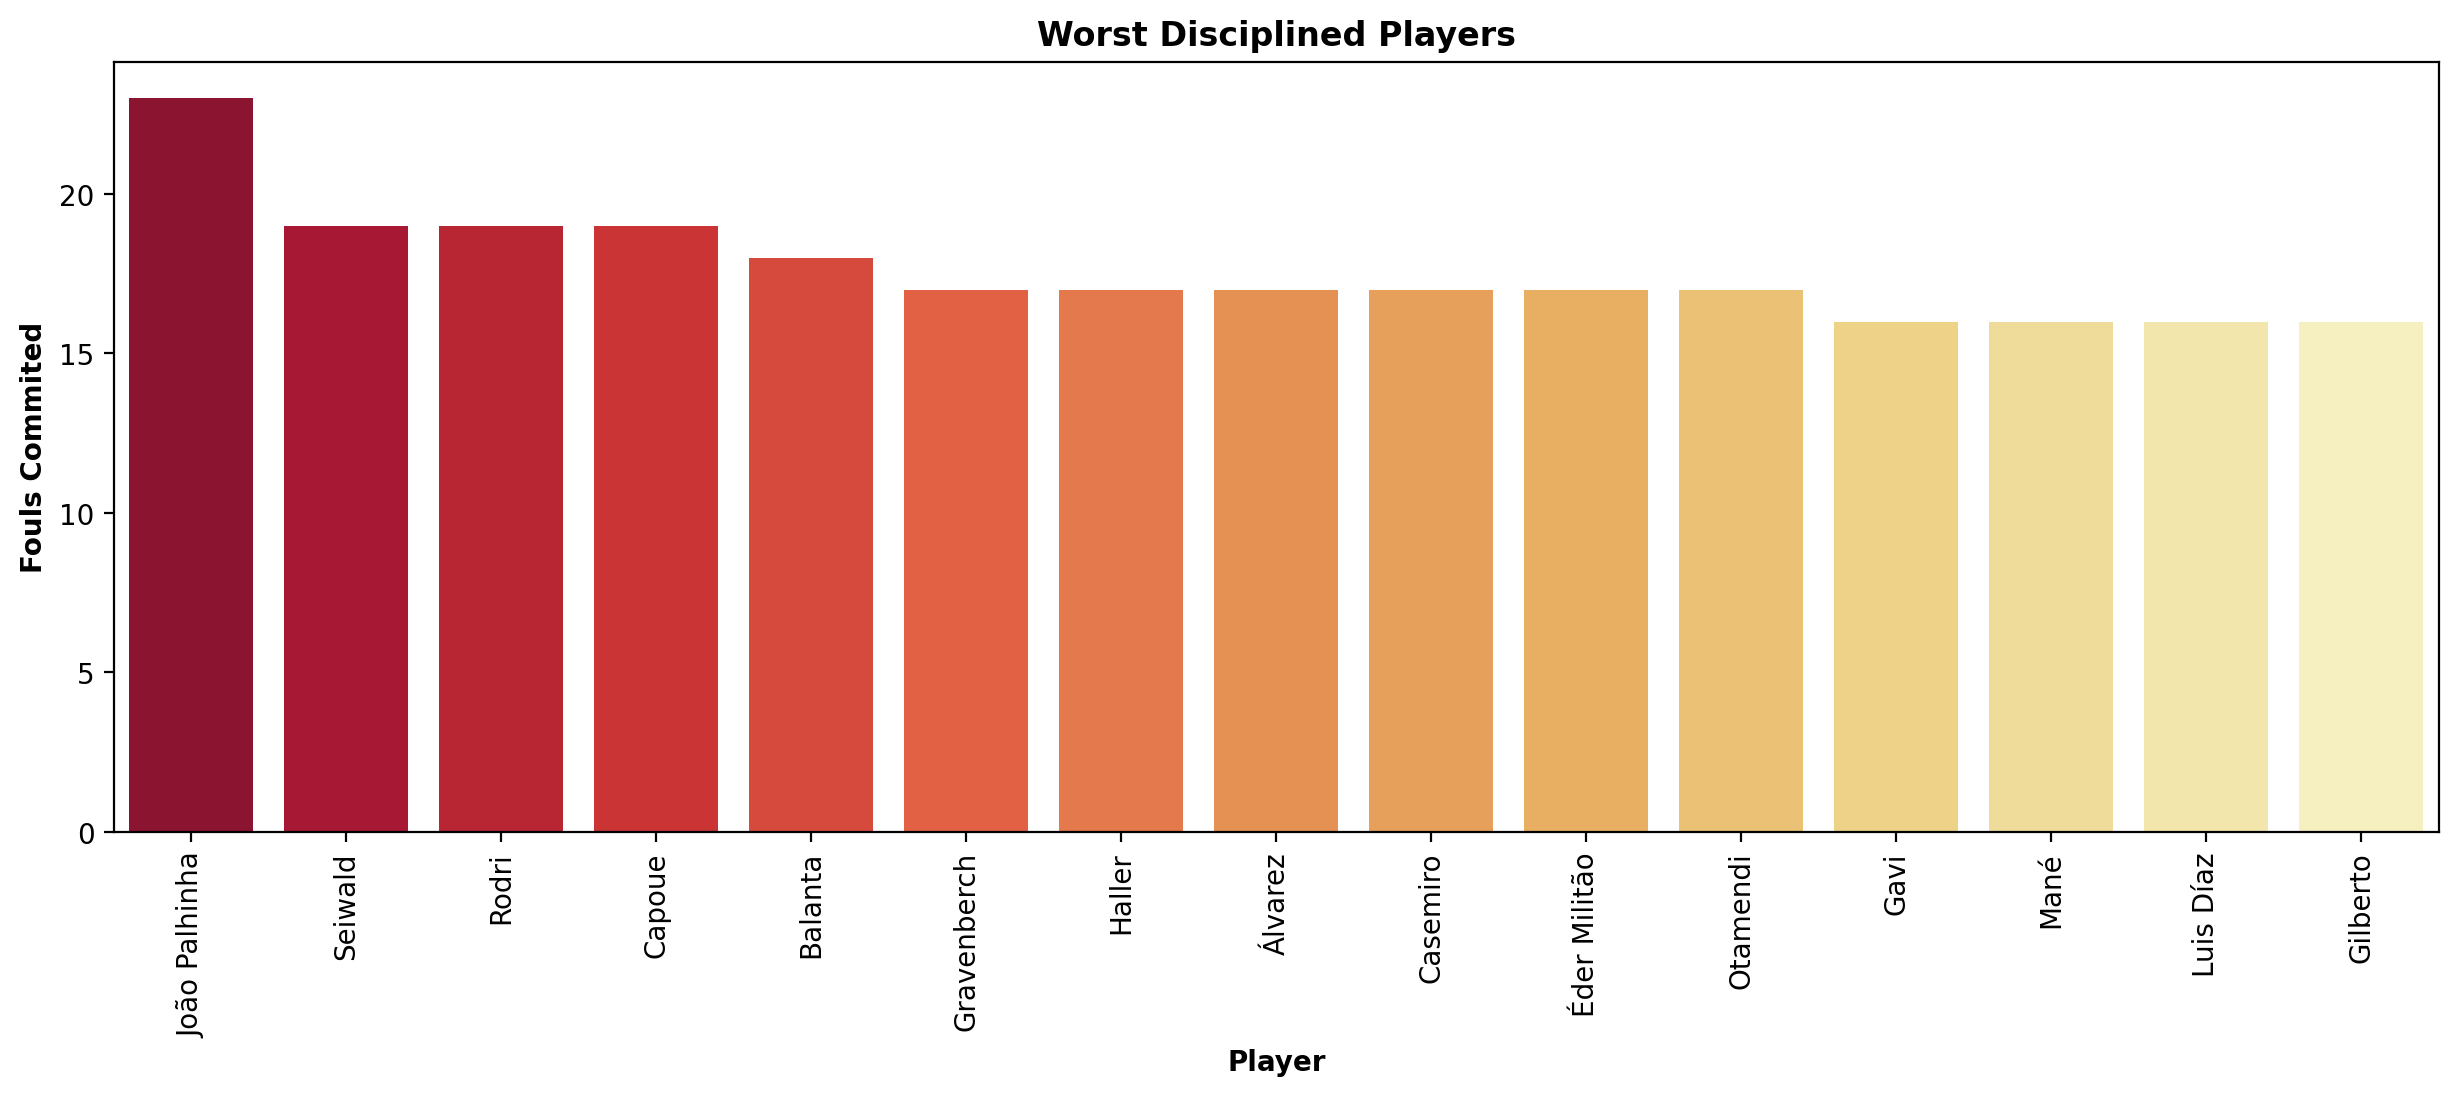

In [147]:
plt.figure(figsize = (15,5), dpi = 200)
plt.title('Worst Disciplined Players', fontsize = 12, weight = 'bold')
sns.barplot(data = top15_most_fouls, x = 'player_name', y = 'fouls_committed', palette = 'YlOrRd_r', hue = 'player_name')
plt.xlabel('Player', fontsize = 10, weight = 'bold')
plt.ylabel('Fouls Commited', fontsize = 10, weight = 'bold')
plt.xticks(rotation = 90)
plt.show()

In [148]:
print("Joao Palhinha, Seiwald and Rodri are the Worst Disciplined Players.")

Joao Palhinha, Seiwald and Rodri are the Worst Disciplined Players.


In [149]:
yellow_red_position = dp_df.groupby('position')[['yellow', 'red']].sum()

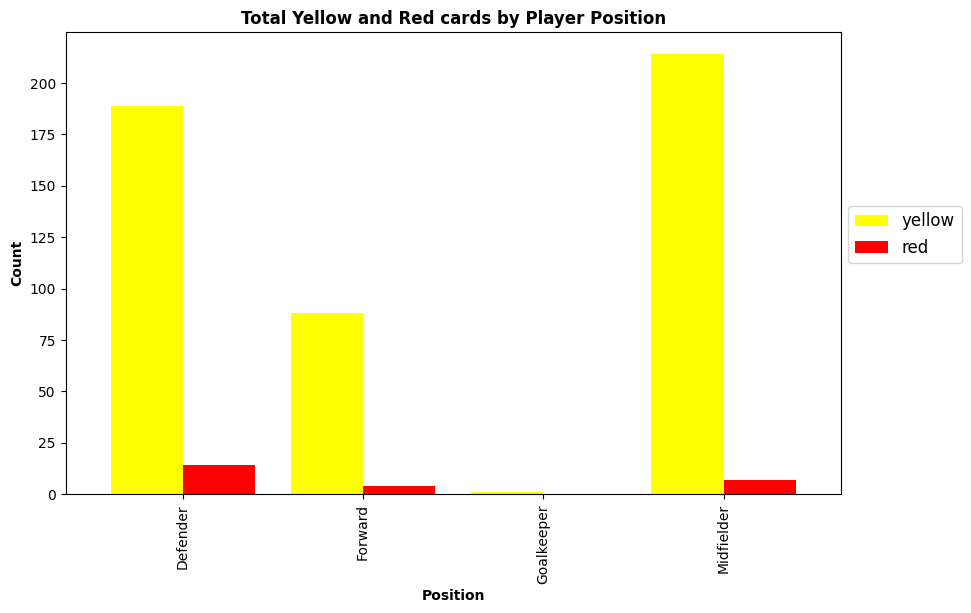

In [150]:
yellow_red_position.plot(kind = 'bar', width = 0.8, color = ['yellow', 'red'],figsize = (10,6))

plt.title('Total Yellow and Red cards by Player Position', fontsize = 12, weight = 'bold')
plt.xlabel('Position', fontsize = 10, weight = 'bold')
plt.ylabel('Count', fontsize = 10, weight = 'bold')
plt.legend(fontsize = 12, loc = (1.01,0.5))
plt.show()

In [151]:
print("The defenders had the most Red cards while the midfielders had the most Yellow cards.")

The defenders had the most Red cards while the midfielders had the most Yellow cards.


In [153]:
fouls_committed_position = dp_df.groupby('position')['fouls_committed'].sum()
fouls_suffered_position = dp_df.groupby('position')['fouls_suffered'].sum()

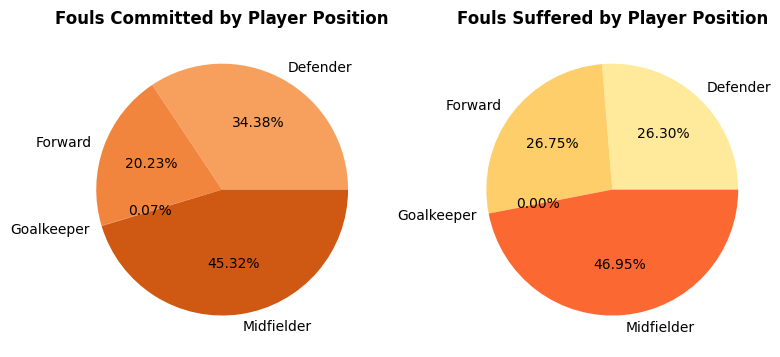

In [160]:
fig, ax = plt.subplots(1, 2, figsize = (8,6))

ax[0].set_title('Fouls Committed by Player Position', fontsize = 12, weight = 'bold')
ax[0].pie(fouls_committed_position, labels = fouls_committed_position.index, autopct = '%1.2f%%', startangle = 0, colors = sns.color_palette('Oranges_d'))

ax[1].set_title('Fouls Suffered by Player Position', fontsize = 12, weight = 'bold')
ax[1].pie(fouls_suffered_position, labels = fouls_suffered_position.index, autopct = '%1.2f%%', startangle = 0, colors = sns.color_palette('YlOrRd'))

plt.tight_layout()
plt.show()

In [161]:
print("The midfielders committed and suffered the most fouls.")

The midfielders committed and suffered the most fouls.
